In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from ipywidgets import interactive
pd.set_option('display.max_columns', 500)

#### Abigail's Method for Reading Excel Files and Formatting Columns

In [2]:
crisis1 = pd.ExcelFile('../data/NSSCrisisv.1.xlsx')

In [3]:
crisis1.sheet_names

['in']

In [4]:
crisis1 = crisis1.parse('in')

In [5]:
crisis1.head(10)

FamilyandChildrensService - CallReports export requested on Monday May 9 2022 at 9:57 AM.  \
0                                                                                             
1                                      CallReportNum                                          
2                                           96627022                                          
3                                           96626934                                          
4                                           96626654                                          
5                                           96626370                                          
6                                           96625909                                          
7                                           96625698                                          
8                                           96625344                                          
9                                           96625140                                          

      Unnamed: 1             Unnamed: 2            Unnamed: 3  \
0            NaN                    NaN                   NaN   
1  ReportVersion  LinkedToCallReportNum  CallDateAndTimeStart   
2         Crisis                    NaN   2021-12-31 23:35:00   
3         Crisis                    NaN   2021-12-31 23:29:00   
4         Crisis                    NaN   2021-12-31 23:07:00   
5         Crisis                    NaN   2021-12-31 22:45:00   
6         Crisis                    NaN   2021-12-31 22:15:00   
7         Crisis                    NaN   2021-12-31 22:03:00   
8         Crisis                    NaN   2021-12-31 21:40:00   
9         Crisis                    NaN   2021-12-31 21:27:00   

            Unnamed: 4  Unnamed: 5 Unnamed: 6      Unnamed: 7  \
0                  NaN         NaN        NaN             NaN   
1   CallDateAndTimeEnd  CallLength  CallerNum  PhoneWorkerNum   
2  2021-12-31 23:58:00          23         -1          136748   
3  2021-12-31 23:35:00           6         -1          136748   
4  2021-12-31 23:28:00          21    1030262          136748   
5  2021-12-31 22:55:00          10    2479348          136748   
6  2021-12-31 22:44:00          29         -1          136748   
7  2021-12-31 22:15:00          12         -1          136748   
8  2021-12-31 22:01:00          21    2003009          136748   
9  2021-12-31 21:39:00          12    1033478          136748   

        Unnamed: 8   Unnamed: 9 Unnamed: 10 Unnamed: 11     Unnamed: 12  \
0              NaN          NaN         NaN         NaN             NaN   
1  PhoneWorkerName  WasRealCall   WasHangup  WasSexCall  WasWrongNumber   
2    Lisa Crawford          NaN         NaN         NaN             NaN   
3    Lisa Crawford          NaN         NaN         NaN             NaN   
4    Lisa Crawford          NaN         NaN         NaN             NaN   
5    Lisa Crawford          NaN         NaN         NaN             NaN   
6    Lisa Crawford          NaN         NaN         NaN             NaN   
7    Lisa Crawford          NaN         NaN         NaN             NaN   
8    Lisa Crawford          NaN         NaN         NaN             NaN   
9    Lisa Crawford          NaN         NaN         NaN             NaN   

    Unnamed: 13    Unnamed: 14 Unnamed: 15    Unnamed: 16 Unnamed: 17  \
0           NaN            NaN         NaN            NaN         NaN   
1  WasPrankCall  WasSilentCall     GeoCode  GeoAssignment  PostalCode   
2           NaN            NaN         NaN            NaN         NaN   
3           NaN            NaN         NaN            NaN       37211   
4           NaN            NaN         NaN            NaN         NaN   
5           NaN            NaN         NaN            NaN       37098   
6           NaN            NaN         NaN            NaN         NaN   
7           NaN            NaN         NaN            NaN         NaN   
8           NaN            NaN         Na

In [6]:
crisis1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52878 entries, 0 to 52877
Columns: 312 entries, FamilyandChildrensService - CallReports export requested on Monday May 9 2022 at 9:57 AM. to Unnamed: 311
dtypes: object(312)
memory usage: 125.9+ MB


In [7]:
crisis1 = crisis1.apply(lambda x: x.str.strip() if x.dtype == "str" else x)

In [8]:
header_row = 1
crisis1.columns = crisis1.iloc[header_row]
crisis1.head()

1  CallReportNum  ReportVersion  LinkedToCallReportNum  CallDateAndTimeStart  \
0                           NaN                    NaN                   NaN   
1  CallReportNum  ReportVersion  LinkedToCallReportNum  CallDateAndTimeStart   
2       96627022         Crisis                    NaN   2021-12-31 23:35:00   
3       96626934         Crisis                    NaN   2021-12-31 23:29:00   
4       96626654         Crisis                    NaN   2021-12-31 23:07:00   

1   CallDateAndTimeEnd  CallLength  CallerNum  PhoneWorkerNum  \
0                  NaN         NaN        NaN             NaN   
1   CallDateAndTimeEnd  CallLength  CallerNum  PhoneWorkerNum   
2  2021-12-31 23:58:00          23         -1          136748   
3  2021-12-31 23:35:00           6         -1          136748   
4  2021-12-31 23:28:00          21    1030262          136748   

1  PhoneWorkerName  WasRealCall  WasHangup  WasSexCall  WasWrongNumber  \
0              NaN          NaN        NaN         NaN             NaN   
1  PhoneWorkerName  WasRealCall  WasHangup  WasSexCall  WasWrongNumber   
2    Lisa Crawford          NaN        NaN         NaN             NaN   
3    Lisa Crawford          NaN        NaN         NaN             NaN   
4    Lisa Crawford          NaN        NaN         NaN             NaN   

1  WasPrankCall  WasSilentCall  GeoCode  GeoAssignment  PostalCode  \
0           NaN            NaN      NaN            NaN         NaN   
1  WasPrankCall  WasSilentCall  GeoCode  GeoAssignment  PostalCode   
2           NaN            NaN      NaN            NaN         NaN   
3           NaN            NaN      NaN            NaN       37211   
4           NaN            NaN      NaN            NaN         NaN   

1  CensusDivision  CensusTrack  CensusReportingArea  211Region  \
0             NaN          NaN                  NaN        NaN   
1  CensusDivision  CensusTrack  CensusReportingArea  211Region   
2             NaN          NaN                  NaN        NaN   
3             NaN          NaN                  NaN        NaN   
4             NaN          NaN                  NaN        NaN   

1  PhoneExtension  PhoneType  ThirdPartyName  ThirdPartyOrganization  \
0             NaN        NaN             NaN                     NaN   
1  PhoneExtension  PhoneType  ThirdPartyName  ThirdPartyOrganization   
2             NaN        NaN             NaN                     NaN   
3             NaN        NaN             NaN                     NaN   
4             NaN        NaN             NaN                     NaN   

1  ThirdPartyPhoneNumber  ThirdPartyAddress  ThirdPartyCity  ThirdPartyCounty  \
0                    NaN                NaN             NaN               NaN   
1  ThirdPartyPhoneNumber  ThirdPartyAddress  ThirdPartyCity  ThirdPartyCounty   
2                    NaN                NaN             NaN               NaN   
3                    NaN                NaN             NaN               NaN   
4                    NaN                NaN             NaN               NaN   

1  ThirdPartyStateProvince  ThirdPartyPostalCode  \
0                      NaN                   NaN   
1  ThirdPartyStateProvince  ThirdPartyPostalCode   
2                      NaN                   NaN   
3                       TN                   NaN   
4                       TN                   NaN   

1                                          Narrative  VolunteerComments  \
0                                                NaN                NaN   
1                                          Narrative  VolunteerComments   
2  S: Caller says that he is lonely, he broke up ...                NaN   
3  S: Caller says he is disappointed because his ...                NaN   
4  S: Caller stated that she is tired and had to ...                NaN   

1                                 Feedback  CallersFeedback  TextField2  \
0                                      NaN              NaN         NaN   
1                              

In [9]:
crisis1 = crisis1.drop(header_row)
crisis1 = crisis1.reset_index(drop=True)
crisis1.head()

1 CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
0                         NaN                   NaN                  NaN   
1      96627022        Crisis                   NaN  2021-12-31 23:35:00   
2      96626934        Crisis                   NaN  2021-12-31 23:29:00   
3      96626654        Crisis                   NaN  2021-12-31 23:07:00   
4      96626370        Crisis                   NaN  2021-12-31 22:45:00   

1   CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum PhoneWorkerName  \
0                  NaN        NaN       NaN            NaN             NaN   
1  2021-12-31 23:58:00         23        -1         136748   Lisa Crawford   
2  2021-12-31 23:35:00          6        -1         136748   Lisa Crawford   
3  2021-12-31 23:28:00         21   1030262         136748   Lisa Crawford   
4  2021-12-31 22:55:00         10   2479348         136748   Lisa Crawford   

1 WasRealCall WasHangup WasSexCall WasWrongNumber WasPrankCall WasSilentCall  \
0         NaN       NaN        NaN            NaN          NaN           NaN   
1         NaN       NaN        NaN            NaN          NaN           NaN   
2         NaN       NaN        NaN            NaN          NaN           NaN   
3         NaN       NaN        NaN            NaN          NaN           NaN   
4         NaN       NaN        NaN            NaN          NaN           NaN   

1 GeoCode GeoAssignment PostalCode CensusDivision CensusTrack  \
0     NaN           NaN        NaN            NaN         NaN   
1     NaN           NaN        NaN            NaN         NaN   
2     NaN           NaN      37211            NaN         NaN   
3     NaN           NaN        NaN            NaN         NaN   
4     NaN           NaN      37098            NaN         NaN   

1 CensusReportingArea 211Region PhoneExtension PhoneType ThirdPartyName  \
0                 NaN       NaN            NaN       NaN            NaN   
1                 NaN       NaN            NaN       NaN            NaN   
2                 NaN       NaN            NaN       NaN            NaN   
3                 NaN       NaN            NaN       NaN            NaN   
4                 NaN       NaN            NaN       NaN            NaN   

1 ThirdPartyOrganization ThirdPartyPhoneNumber ThirdPartyAddress  \
0                    NaN                   NaN               NaN   
1                    NaN                   NaN               NaN   
2                    NaN                   NaN               NaN   
3                    NaN                   NaN               NaN   
4                    NaN                   NaN               NaN   

1 ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
0            NaN              NaN                     NaN   
1            NaN              NaN                     NaN   
2            NaN              NaN                      TN   
3            NaN              NaN                      TN   
4            NaN              NaN                      TN   

1 ThirdPartyPostalCode                                          Narrative  \
0                  NaN                                                NaN   
1                  NaN  S: Caller says that he is lonely, he broke up ...   
2                  NaN  S: Caller says he is disappointed because his ...   
3                  NaN  S: Caller stated that she is tired and had to ...   
4                  NaN  S: Caller stated that she fell and broke her r...   

1 VolunteerComments                                 Feedback CallersFeedback  \
0               NaN                                      NaN             NaN   
1               NaN  (No feedback was needed for this call.)             NaN   
2               NaN  (No feedback was needed for this call.)             NaN   
3               NaN                                      NaN             NaN   
4               NaN                                      NaN             NaN   

1 TextField2 TextField3 TextFie

In [10]:
crisis1.tail()

1     CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
52872      69492892        Crisis                   NaN  2020-01-01 05:14:00   
52873      69492741        Crisis                   NaN  2020-01-01 04:45:00   
52874      69492019        Crisis                   NaN  2020-01-01 03:00:00   
52875      69492070        Crisis                   NaN  2020-01-01 01:45:00   
52876      69492055        Crisis                   NaN  2020-01-01 00:04:00   

1       CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum  \
52872  2020-01-01 05:28:00         14   1029822         101461   
52873  2020-01-01 05:05:00         20        -1         101461   
52874  2020-01-01 03:18:00         18        -1         101461   
52875  2020-01-01 01:49:00          4        -1         101461   
52876  2020-01-01 00:05:00          1        -1         101461   

1     PhoneWorkerName WasRealCall WasHangup WasSexCall WasWrongNumber  \
52872   Rachel Bailey         NaN       NaN        NaN            NaN   
52873   Rachel Bailey         NaN       NaN        NaN            NaN   
52874   Rachel Bailey         NaN       NaN        NaN            NaN   
52875   Rachel Bailey         NaN       NaN        NaN            NaN   
52876   Rachel Bailey         NaN       NaN        NaN            NaN   

1     WasPrankCall WasSilentCall GeoCode GeoAssignment PostalCode  \
52872          NaN           NaN     NaN           NaN      37138   
52873          NaN           NaN     NaN           NaN        NaN   
52874          NaN           NaN     NaN           NaN        NaN   
52875          NaN           NaN     NaN           NaN        NaN   
52876          NaN           NaN     NaN           NaN        NaN   

1     CensusDivision CensusTrack CensusReportingArea 211Region PhoneExtension  \
52872            NaN         NaN                 NaN       NaN            NaN   
52873            NaN         NaN                 NaN       NaN            NaN   
52874            NaN         NaN                 NaN       NaN            NaN   
52875            NaN         NaN                 NaN       NaN            NaN   
52876            NaN         NaN                 NaN       NaN            NaN   

1     PhoneType ThirdPartyName ThirdPartyOrganization ThirdPartyPhoneNumber  \
52872       NaN            NaN                    NaN                   NaN   
52873       NaN            NaN                    NaN                   NaN   
52874       NaN            NaN                    NaN                   NaN   
52875       NaN            NaN                    NaN                   NaN   
52876       NaN            NaN                    NaN                   NaN   

1     ThirdPartyAddress ThirdPartyCity ThirdPartyCounty  \
52872               NaN            NaN              NaN   
52873               NaN            NaN              NaN   
52874               NaN            NaN              NaN   
52875               NaN            NaN              NaN   
52876               NaN            NaN              NaN   

1     ThirdPartyStateProvince ThirdPartyPostalCode  \
52872                      TN                  NaN   
52873                     NaN                  NaN   
52874                     NaN                  NaN   
52875                     NaN                  NaN   
52876                     NaN                  NaN   

1                                              Narrative VolunteerComments  \
52872  S- caller reported fear over evictionO- male, ...               NaN   
52873  S- caller reported depression and anxiety. Rep...               NaN   
52874  S- caller reported it was a hard holiday and h...               NaN   
52875  S- caller made inappropriate noises and kept a...               NaN   
52876                                                NaN               NaN   

1                                     Feedback CallersFeedback TextField2  \
52872                                      NaN             NaN        NaN   
528

In [11]:
crisis2 = pd.ExcelFile('../data/NSSCrisisv.2.xlsx')

In [12]:
crisis2.sheet_names

['in']

In [13]:
crisis2 = crisis2.parse('in')

In [14]:
crisis2.head()

FamilyandChildrensService - CallReports export requested on Monday May 9 2022 at 9:58 AM.  \
0                                                                                             
1                                      CallReportNum                                          
2                                        101384892.0                                          
3                                        101384348.0                                          
4                                        101383635.0                                          

      Unnamed: 1             Unnamed: 2            Unnamed: 3  \
0            NaN                    NaN                   NaN   
1  ReportVersion  LinkedToCallReportNum  CallDateAndTimeStart   
2     Crisis v.2                    NaN   2022-04-30 23:19:00   
3     Crisis v.2                    NaN   2022-04-30 22:46:00   
4     Crisis v.2                    NaN   2022-04-30 22:03:00   

            Unnamed: 4  Unnamed: 5 Unnamed: 6      Unnamed: 7  \
0                  NaN         NaN        NaN             NaN   
1   CallDateAndTimeEnd  CallLength  CallerNum  PhoneWorkerNum   
2  2022-04-30 23:27:00         8.0  1025380.0         55599.0   
3  2022-04-30 23:13:00        27.0       -1.0         55599.0   
4  2022-04-30 22:27:00        24.0       -1.0        169061.0   

        Unnamed: 8   Unnamed: 9 Unnamed: 10 Unnamed: 11     Unnamed: 12  \
0              NaN          NaN         NaN         NaN             NaN   
1  PhoneWorkerName  WasRealCall   WasHangup  WasSexCall  WasWrongNumber   
2  Darren Anderson          NaN         NaN         NaN             NaN   
3  Darren Anderson          NaN         NaN         NaN             NaN   
4   Tandra Freeman          NaN         NaN         NaN             NaN   

    Unnamed: 13    Unnamed: 14 Unnamed: 15    Unnamed: 16 Unnamed: 17  \
0           NaN            NaN         NaN            NaN         NaN   
1  WasPrankCall  WasSilentCall     GeoCode  GeoAssignment  CountyName   
2           NaN            NaN         NaN            NaN   Robertson   
3           NaN            NaN         NaN            NaN       Smith   
4           NaN            NaN         NaN            NaN         NaN   

     Unnamed: 18    Unnamed: 19 Unnamed: 20     Unnamed: 21  Unnamed: 22  \
0            NaN            NaN         NaN             NaN          NaN   
1  StateProvince    CountryName  PostalCode  CensusDivision  CensusTrack   
2             TN  United States         NaN             NaN          NaN   
3             TN  United States     38563.0             NaN          NaN   
4            NaN            NaN         NaN             NaN          NaN   

           Unnamed: 23 Unnamed: 24     Unnamed: 25 Unnamed: 26  \
0                  NaN         NaN             NaN         NaN   
1  CensusReportingArea   211Region  PhoneExtension   PhoneType   
2                  NaN         NaN             NaN         NaN   
3                  NaN         NaN             NaN         NaN   
4                  NaN         NaN             NaN         NaN   

      Unnamed: 27             Unnamed: 28            Unnamed: 29  \
0             NaN                     NaN                    NaN   
1  ThirdPartyName  ThirdPartyOrganization  ThirdPartyPhoneNumber   
2             NaN                     NaN                    NaN   
3             NaN                     NaN                    NaN   
4             NaN                     NaN                    NaN   

         Unnamed: 30     Unnamed: 31       Unnamed: 32  \
0                NaN             NaN               NaN   
1  ThirdPartyAddress  ThirdPartyCity  ThirdPartyCounty   
2                NaN             NaN               NaN   
3                NaN             NaN               NaN   
4                NaN             NaN               NaN   

               Unnamed: 33           Unnamed: 34 Unnamed: 35  \
0                      NaN                   NaN         NaN   
1  ThirdPartyStateP

In [15]:
crisis2.tail()

FamilyandChildrensService - CallReports export requested on Monday May 9 2022 at 9:58 AM.  \
10645                                         96673255.0                                          
10646                                         96645142.0                                          
10647                                         96640741.0                                          
10648                                         96849680.0                                          
10649                                         97267704.0                                          

                      Unnamed: 1 Unnamed: 2           Unnamed: 3  \
10645  Homicidal Risk Assessment        Yes  2022-01-01 20:34:00   
10646    Suicide Risk Assessment        Yes  2022-01-01 18:27:00   
10647    Suicide Risk Assessment        Yes  2022-01-01 14:44:00   
10648                 Crisis v.2        NaN  2022-01-01 12:09:00   
10649    Suicide Risk Assessment        Yes  2022-01-01 02:30:00   

                Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7       Unnamed: 8  \
10645  2022-01-01 20:58:00       24.0       -1.0   166157.0   Tasia Thompson   
10646  2022-01-01 19:12:00       45.0       -1.0   166157.0   Tasia Thompson   
10647  2022-01-01 15:19:00       35.0       -1.0   136748.0    Lisa Crawford   
10648  2022-01-01 12:10:00        1.0       -1.0    53133.0  Shannon Huffman   
10649  2022-01-01 03:10:00       40.0       -1.0   169061.0   Tandra Freeman   

      Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
10645        NaN         NaN         NaN         NaN         NaN         NaN   
10646        NaN         NaN         NaN         NaN         NaN         NaN   
10647        NaN         NaN         NaN         NaN         NaN         NaN   
10648        NaN         NaN         NaN         NaN         NaN         NaN   
10649        NaN         NaN         NaN         NaN         NaN         NaN   

      Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18    Unnamed: 19  \
10645         NaN         NaN    Davidson          TN  United States   
10646         NaN         NaN    Davidson          TN  United States   
10647         NaN         NaN         NaN          TN            NaN   
10648         NaN         NaN         NaN         NaN            NaN   
10649         NaN         NaN         NaN          TN            NaN   

      Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25  \
10645     37072.0         NaN         NaN         NaN         NaN         NaN   
10646     37208.0         NaN         NaN         NaN         NaN         NaN   
10647         NaN         NaN         NaN         NaN         NaN         NaN   
10648         NaN         NaN         NaN         NaN         NaN         NaN   
10649         NaN         NaN         NaN         NaN         NaN         NaN   

      Unnamed: 26 Unnamed: 27 Unnamed: 28 Unnamed: 29 Unnamed: 30 Unnamed: 31  \
10645         NaN         NaN         NaN         NaN         NaN         NaN   
10646         NaN         NaN         NaN         NaN         NaN         NaN   
10647         NaN         NaN         NaN         NaN         NaN         NaN   
10648         NaN         NaN         NaN         NaN         NaN         NaN   
10649         NaN         NaN         NaN         NaN         NaN         NaN   

      Unnamed: 32 Unnamed: 33 Unnamed: 34  \
10645         NaN          TN         NaN   
10646         NaN          TN         NaN   
10647         NaN         NaN         NaN   
10648         NaN         NaN         NaN   
10649         NaN         NaN         NaN   

                                             Unnamed: 35 Unnamed: 36  \
10645  Caller was calling because he was wanting to k...         NaN   
10646                                                NaN         NaN   
10647                                                NaN         NaN   
10648                                                NaN         NaN   
10

In [16]:
crisis2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10650 entries, 0 to 10649
Columns: 261 entries, FamilyandChildrensService - CallReports export requested on Monday May 9 2022 at 9:58 AM. to Unnamed: 260
dtypes: object(261)
memory usage: 21.2+ MB


In [17]:
crisis2 = crisis2.dropna(axis=1, how ='all')
crisis2 = crisis2.dropna(axis=0, how='all')
crisis2.head()

FamilyandChildrensService - CallReports export requested on Monday May 9 2022 at 9:58 AM.  \
0                                                                                             
1                                      CallReportNum                                          
2                                        101384892.0                                          
3                                        101384348.0                                          
4                                        101383635.0                                          

      Unnamed: 1             Unnamed: 2            Unnamed: 3  \
0            NaN                    NaN                   NaN   
1  ReportVersion  LinkedToCallReportNum  CallDateAndTimeStart   
2     Crisis v.2                    NaN   2022-04-30 23:19:00   
3     Crisis v.2                    NaN   2022-04-30 22:46:00   
4     Crisis v.2                    NaN   2022-04-30 22:03:00   

            Unnamed: 4  Unnamed: 5 Unnamed: 6      Unnamed: 7  \
0                  NaN         NaN        NaN             NaN   
1   CallDateAndTimeEnd  CallLength  CallerNum  PhoneWorkerNum   
2  2022-04-30 23:27:00         8.0  1025380.0         55599.0   
3  2022-04-30 23:13:00        27.0       -1.0         55599.0   
4  2022-04-30 22:27:00        24.0       -1.0        169061.0   

        Unnamed: 8   Unnamed: 9 Unnamed: 10 Unnamed: 11     Unnamed: 12  \
0              NaN          NaN         NaN         NaN             NaN   
1  PhoneWorkerName  WasRealCall   WasHangup  WasSexCall  WasWrongNumber   
2  Darren Anderson          NaN         NaN         NaN             NaN   
3  Darren Anderson          NaN         NaN         NaN             NaN   
4   Tandra Freeman          NaN         NaN         NaN             NaN   

    Unnamed: 13    Unnamed: 14 Unnamed: 15    Unnamed: 16 Unnamed: 17  \
0           NaN            NaN         NaN            NaN         NaN   
1  WasPrankCall  WasSilentCall     GeoCode  GeoAssignment  CountyName   
2           NaN            NaN         NaN            NaN   Robertson   
3           NaN            NaN         NaN            NaN       Smith   
4           NaN            NaN         NaN            NaN         NaN   

     Unnamed: 18    Unnamed: 19 Unnamed: 20     Unnamed: 21  Unnamed: 22  \
0            NaN            NaN         NaN             NaN          NaN   
1  StateProvince    CountryName  PostalCode  CensusDivision  CensusTrack   
2             TN  United States         NaN             NaN          NaN   
3             TN  United States     38563.0             NaN          NaN   
4            NaN            NaN         NaN             NaN          NaN   

           Unnamed: 23 Unnamed: 24     Unnamed: 25 Unnamed: 26  \
0                  NaN         NaN             NaN         NaN   
1  CensusReportingArea   211Region  PhoneExtension   PhoneType   
2                  NaN         NaN             NaN         NaN   
3                  NaN         NaN             NaN         NaN   
4                  NaN         NaN             NaN         NaN   

      Unnamed: 27             Unnamed: 28            Unnamed: 29  \
0             NaN                     NaN                    NaN   
1  ThirdPartyName  ThirdPartyOrganization  ThirdPartyPhoneNumber   
2             NaN                     NaN                    NaN   
3             NaN                     NaN                    NaN   
4             NaN                     NaN                    NaN   

         Unnamed: 30     Unnamed: 31       Unnamed: 32  \
0                NaN             NaN               NaN   
1  ThirdPartyAddress  ThirdPartyCity  ThirdPartyCounty   
2                NaN             NaN               NaN   
3                NaN             NaN               NaN   
4                NaN             NaN               NaN   

               Unnamed: 33           Unnamed: 34 Unnamed: 35  \
0                      NaN                   NaN         NaN   
1  ThirdPartyStateP

In [18]:
crisis2 = crisis2.apply(lambda x: x.str.strip() if x.dtype == "str" else x)

In [19]:
crisis2.columns = crisis2.iloc[header_row]
crisis2 = crisis2.drop(header_row)
crisis2 = crisis2.reset_index(drop=True)
crisis2.head()

1 CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
0                         NaN                   NaN                  NaN   
1   101384892.0    Crisis v.2                   NaN  2022-04-30 23:19:00   
2   101384348.0    Crisis v.2                   NaN  2022-04-30 22:46:00   
3   101383635.0    Crisis v.2                   NaN  2022-04-30 22:03:00   
4   101383441.0    Crisis v.2                   NaN  2022-04-30 21:52:00   

1   CallDateAndTimeEnd CallLength  CallerNum PhoneWorkerNum  PhoneWorkerName  \
0                  NaN        NaN        NaN            NaN              NaN   
1  2022-04-30 23:27:00        8.0  1025380.0        55599.0  Darren Anderson   
2  2022-04-30 23:13:00       27.0       -1.0        55599.0  Darren Anderson   
3  2022-04-30 22:27:00       24.0       -1.0       169061.0   Tandra Freeman   
4  2022-04-30 22:15:00       23.0       -1.0       170047.0       Jane Davis   

1 WasRealCall WasHangup WasSexCall WasWrongNumber WasPrankCall WasSilentCall  \
0         NaN       NaN        NaN            NaN          NaN           NaN   
1         NaN       NaN        NaN            NaN          NaN           NaN   
2         NaN       NaN        NaN            NaN          NaN           NaN   
3         NaN       NaN        NaN            NaN          NaN           NaN   
4         NaN       NaN        NaN            NaN          NaN           NaN   

1 GeoCode GeoAssignment CountyName StateProvince    CountryName PostalCode  \
0     NaN           NaN        NaN           NaN            NaN        NaN   
1     NaN           NaN  Robertson            TN  United States        NaN   
2     NaN           NaN      Smith            TN  United States    38563.0   
3     NaN           NaN        NaN           NaN            NaN        NaN   
4     NaN           NaN        NaN           NaN            NaN        NaN   

1 CensusDivision CensusTrack CensusReportingArea 211Region PhoneExtension  \
0            NaN         NaN                 NaN       NaN            NaN   
1            NaN         NaN                 NaN       NaN            NaN   
2            NaN         NaN                 NaN       NaN            NaN   
3            NaN         NaN                 NaN       NaN            NaN   
4            NaN         NaN                 NaN       NaN            NaN   

1 PhoneType ThirdPartyName ThirdPartyOrganization ThirdPartyPhoneNumber  \
0       NaN            NaN                    NaN                   NaN   
1       NaN            NaN                    NaN                   NaN   
2       NaN            NaN                    NaN                   NaN   
3       NaN            NaN                    NaN                   NaN   
4       NaN            NaN                    NaN                   NaN   

1 ThirdPartyAddress ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
0               NaN            NaN              NaN                     NaN   
1               NaN            NaN              NaN                     NaN   
2               NaN            NaN              NaN                     NaN   
3               NaN            NaN              NaN                     NaN   
4               NaN            NaN              NaN                     NaN   

1 ThirdPartyPostalCode Narrative  \
0                  NaN       NaN   
1                  NaN       NaN   
2                  NaN       NaN   
3                  NaN       NaN   
4                  NaN       NaN   

1                                  VolunteerComments  \
0                                                NaN   
1  Client said she broke her wrist while coming i...   
2  Caller discussed having PTSD from complicated ...   
3  Caller has a conflict with family and friends....   
4  woman is disabled and has a TBI - thinks she c...   

1                                 Feedback CallersFeedback TextField2  \
0                                      NaN             NaN        NaN   
1                      

In [20]:
crisis = pd.concat([crisis2, crisis1])

In [21]:
crisis = crisis.reset_index(drop=True)
crisis.head()

1 CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
0                         NaN                   NaN                  NaN   
1   101384892.0    Crisis v.2                   NaN  2022-04-30 23:19:00   
2   101384348.0    Crisis v.2                   NaN  2022-04-30 22:46:00   
3   101383635.0    Crisis v.2                   NaN  2022-04-30 22:03:00   
4   101383441.0    Crisis v.2                   NaN  2022-04-30 21:52:00   

1   CallDateAndTimeEnd CallLength  CallerNum PhoneWorkerNum  PhoneWorkerName  \
0                  NaN        NaN        NaN            NaN              NaN   
1  2022-04-30 23:27:00        8.0  1025380.0        55599.0  Darren Anderson   
2  2022-04-30 23:13:00       27.0       -1.0        55599.0  Darren Anderson   
3  2022-04-30 22:27:00       24.0       -1.0       169061.0   Tandra Freeman   
4  2022-04-30 22:15:00       23.0       -1.0       170047.0       Jane Davis   

1 WasRealCall WasHangup WasSexCall WasWrongNumber WasPrankCall WasSilentCall  \
0         NaN       NaN        NaN            NaN          NaN           NaN   
1         NaN       NaN        NaN            NaN          NaN           NaN   
2         NaN       NaN        NaN            NaN          NaN           NaN   
3         NaN       NaN        NaN            NaN          NaN           NaN   
4         NaN       NaN        NaN            NaN          NaN           NaN   

1 GeoCode GeoAssignment CountyName StateProvince    CountryName PostalCode  \
0     NaN           NaN        NaN           NaN            NaN        NaN   
1     NaN           NaN  Robertson            TN  United States        NaN   
2     NaN           NaN      Smith            TN  United States    38563.0   
3     NaN           NaN        NaN           NaN            NaN        NaN   
4     NaN           NaN        NaN           NaN            NaN        NaN   

1 CensusDivision CensusTrack CensusReportingArea 211Region PhoneExtension  \
0            NaN         NaN                 NaN       NaN            NaN   
1            NaN         NaN                 NaN       NaN            NaN   
2            NaN         NaN                 NaN       NaN            NaN   
3            NaN         NaN                 NaN       NaN            NaN   
4            NaN         NaN                 NaN       NaN            NaN   

1 PhoneType ThirdPartyName ThirdPartyOrganization ThirdPartyPhoneNumber  \
0       NaN            NaN                    NaN                   NaN   
1       NaN            NaN                    NaN                   NaN   
2       NaN            NaN                    NaN                   NaN   
3       NaN            NaN                    NaN                   NaN   
4       NaN            NaN                    NaN                   NaN   

1 ThirdPartyAddress ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
0               NaN            NaN              NaN                     NaN   
1               NaN            NaN              NaN                     NaN   
2               NaN            NaN              NaN                     NaN   
3               NaN            NaN              NaN                     NaN   
4               NaN            NaN              NaN                     NaN   

1 ThirdPartyPostalCode Narrative  \
0                  NaN       NaN   
1                  NaN       NaN   
2                  NaN       NaN   
3                  NaN       NaN   
4                  NaN       NaN   

1                                  VolunteerComments  \
0                                                NaN   
1  Client said she broke her wrist while coming i...   
2  Caller discussed having PTSD from complicated ...   
3  Caller has a conflict with family and friends....   
4  woman is disabled and has a TBI - thinks she c...   

1                                 Feedback CallersFeedback TextField2  \
0                                      NaN             NaN        NaN   
1                      

In [22]:
crisis.shape

(63526, 372)

In [23]:
crisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63526 entries, 0 to 63525
Columns: 372 entries, CallReportNum to Transfer Information - Which line/agency transferred you to this Crisis Line?
dtypes: object(372)
memory usage: 180.3+ MB


#### EDA & Demographics (Occupation & Education Deep Dive)

In [24]:
crisis['CallDateAndTimeStart'] = crisis['CallDateAndTimeStart'].astype('str')

In [25]:
crisis['call_date'] = crisis.CallDateAndTimeStart.str[0:10]

In [26]:
crisis.head()

1 CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
0                         NaN                   NaN                  nan   
1   101384892.0    Crisis v.2                   NaN  2022-04-30 23:19:00   
2   101384348.0    Crisis v.2                   NaN  2022-04-30 22:46:00   
3   101383635.0    Crisis v.2                   NaN  2022-04-30 22:03:00   
4   101383441.0    Crisis v.2                   NaN  2022-04-30 21:52:00   

1   CallDateAndTimeEnd CallLength  CallerNum PhoneWorkerNum  PhoneWorkerName  \
0                  NaN        NaN        NaN            NaN              NaN   
1  2022-04-30 23:27:00        8.0  1025380.0        55599.0  Darren Anderson   
2  2022-04-30 23:13:00       27.0       -1.0        55599.0  Darren Anderson   
3  2022-04-30 22:27:00       24.0       -1.0       169061.0   Tandra Freeman   
4  2022-04-30 22:15:00       23.0       -1.0       170047.0       Jane Davis   

1 WasRealCall WasHangup WasSexCall WasWrongNumber WasPrankCall WasSilentCall  \
0         NaN       NaN        NaN            NaN          NaN           NaN   
1         NaN       NaN        NaN            NaN          NaN           NaN   
2         NaN       NaN        NaN            NaN          NaN           NaN   
3         NaN       NaN        NaN            NaN          NaN           NaN   
4         NaN       NaN        NaN            NaN          NaN           NaN   

1 GeoCode GeoAssignment CountyName StateProvince    CountryName PostalCode  \
0     NaN           NaN        NaN           NaN            NaN        NaN   
1     NaN           NaN  Robertson            TN  United States        NaN   
2     NaN           NaN      Smith            TN  United States    38563.0   
3     NaN           NaN        NaN           NaN            NaN        NaN   
4     NaN           NaN        NaN           NaN            NaN        NaN   

1 CensusDivision CensusTrack CensusReportingArea 211Region PhoneExtension  \
0            NaN         NaN                 NaN       NaN            NaN   
1            NaN         NaN                 NaN       NaN            NaN   
2            NaN         NaN                 NaN       NaN            NaN   
3            NaN         NaN                 NaN       NaN            NaN   
4            NaN         NaN                 NaN       NaN            NaN   

1 PhoneType ThirdPartyName ThirdPartyOrganization ThirdPartyPhoneNumber  \
0       NaN            NaN                    NaN                   NaN   
1       NaN            NaN                    NaN                   NaN   
2       NaN            NaN                    NaN                   NaN   
3       NaN            NaN                    NaN                   NaN   
4       NaN            NaN                    NaN                   NaN   

1 ThirdPartyAddress ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
0               NaN            NaN              NaN                     NaN   
1               NaN            NaN              NaN                     NaN   
2               NaN            NaN              NaN                     NaN   
3               NaN            NaN              NaN                     NaN   
4               NaN            NaN              NaN                     NaN   

1 ThirdPartyPostalCode Narrative  \
0                  NaN       NaN   
1                  NaN       NaN   
2                  NaN       NaN   
3                  NaN       NaN   
4                  NaN       NaN   

1                                  VolunteerComments  \
0                                                NaN   
1  Client said she broke her wrist while coming i...   
2  Caller discussed having PTSD from complicated ...   
3  Caller has a conflict with family and friends....   
4  woman is disabled and has a TBI - thinks she c...   

1                                 Feedback CallersFeedback TextField2  \
0                                      NaN             NaN        NaN   
1                      

In [27]:
call_dates = crisis['call_date'].value_counts()
call_dates = pd.DataFrame(call_dates).reset_index()
call_dates.columns = ['date', 'number_calls']
call_dates.head()

date  number_calls
0  2021-03-29           151
1  2021-03-30           143
2  2022-01-17           132
3  2022-04-19           127
4  2022-01-14           127

In [28]:
crisis_issues = crisis.loc[:,['CRISIS Issues' in i for i in crisis.columns]]
crisis_issues.head()

1 CRISIS Issues - Abusive Behavior  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                              NaN   

1 CRISIS Issues - Call Problems (specify at least 2)  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

1 CRISIS Issues - Emotional State CRISIS Issues - Financial/Basic Needs  \
0                             NaN                                   NaN   
1                             NaN                                   NaN   
2                             NaN                                   NaN   
3                             NaN                                   NaN   
4                             NaN                                   NaN   

1 CRISIS Issues - Health/Physical CRISIS Issues - Homicide  \
0                             NaN                      NaN   
1                             NaN                      NaN   
2                             NaN                      NaN   
3                             NaN                      NaN   
4                             NaN                      NaN   

1 CRISIS Issues - Information or Services Needed  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

1 CRISIS Issues - Mental Health CRISIS Issues - No Issue Call  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

1 CRISIS Issues - Other Description CRISIS Issues - Relationships  \
0                               NaN                           NaN   
1                               NaN                           NaN   
2                               NaN                           NaN   
3                               NaN                           NaN   
4                               NaN                           NaN   

1 CRISIS Issues - Substances CRISIS Issues - Suicide  
0                        NaN                     NaN  
1                        NaN                     NaN  
2                        NaN                     NaN  
3                        NaN                     NaN  
4                        NaN                     NaN

In [29]:
crisis_notes = crisis_issues.count().to_frame().reset_index()

In [30]:
crisis_notes.columns = ['crisis_issue', 'call_volume']

In [31]:
crisis_notes = crisis_notes.sort_values(by='call_volume', ascending=False)
crisis_notes.head(20)

crisis_issue  call_volume
2                     CRISIS Issues - Emotional State        35688
10                      CRISIS Issues - Relationships        23180
7                       CRISIS Issues - Mental Health        18437
4                     CRISIS Issues - Health/Physical         4842
12                            CRISIS Issues - Suicide         4359
9                   CRISIS Issues - Other Description         3106
11                         CRISIS Issues - Substances         2599
0                    CRISIS Issues - Abusive Behavior         2046
3               CRISIS Issues - Financial/Basic Needs         2010
6      CRISIS Issues - Information or Services Needed         1833
8                       CRISIS Issues - No Issue Call         1519
5                            CRISIS Issues - Homicide           46
1   CRISIS Issues - Call Problems (specify at leas...            0

In [32]:
demographics = crisis.loc[:,['Demographics' in i for i in crisis.columns]]
demographics.head()

1 HOM AX Demographics - Occupation SUI AX Demographics - Name of Third Party  \
0                              NaN                                       NaN   
1                              NaN                                       NaN   
2                              NaN                                       NaN   
3                              NaN                                       NaN   
4                              NaN                                       NaN   

1 SUI AX Demographics - Occupation CRISIS Demographics - Age  \
0                              NaN                       NaN   
1                              NaN                     56-70   
2                              NaN                       NaN   
3                              NaN                       NaN   
4                              NaN                       NaN   

1 CRISIS Demographics - Gender Identity CRISIS Demographics - Military  \
0                                   NaN                            NaN   
1                                Female            N/A (did not serve)   
2                                   NaN                        Unknown   
3                                   NaN                        Unknown   
4                                Female                        Unknown   

1 CRISIS Demographics - Race/Ethnicity HOM AX Demographics - Age  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                            Caucasian                       NaN   
4                                  NaN                       NaN   

1 HOM AX Demographics - Education Level HOM AX Demographics - Ethnicity  \
0                                   NaN                             NaN   
1                                   NaN                             NaN   
2                                   NaN                             NaN   
3                                   NaN                             NaN   
4                                   NaN                             NaN   

1 HOM AX Demographics - Gender HOM AX Demographics - Has a disability?  \
0                          NaN                                     NaN   
1                          NaN                                     NaN   
2                          NaN                                     NaN   
3                          NaN                                     NaN   
4                          NaN                                     NaN   

1 HOM AX Demographics - Homeless? HOM AX Demographics - Income?  \
0                             NaN                           NaN   
1                             NaN                           NaN   
2                             NaN                           NaN   
3                             NaN                           NaN   
4                             NaN                           NaN   

1 HOM AX Demographics - Is working? HOM AX Demographics - Marital Status  \
0                               NaN                                  NaN   
1                               NaN                                  NaN   
2                               NaN                                  NaN   
3                               NaN                                  NaN   
4                               NaN                                  NaN   

1 HOM AX Demographics - Military  \
0                            NaN   
1                            NaN   
2                            NaN   
3                            NaN   
4                            NaN   

1 HOM AX Third-Party Risk Assessment Demographics - Does this risk assesment have different demographics than the caller? (Third-party Call)  \
0                                                NaN                                                                                           
1                  

In [33]:
demographics.count()

1
HOM AX Demographics - Occupation                                                                                                                         2
SUI AX Demographics - Name of Third Party                                                                                                                5
SUI AX Demographics - Occupation                                                                                                                         0
CRISIS Demographics - Age                                                                                                                            22061
CRISIS Demographics - Gender Identity                                                                                                                41820
CRISIS Demographics - Military                                                                                                                       54543
CRISIS Demographics - Race/Ethnicity                                

In [34]:
crisis['call_year'] = crisis.CallDateAndTimeStart.str[0:4]

In [35]:
filter2020 = crisis['call_year'].isin(['2020'])

In [36]:
calls2020 = crisis[filter2020]
calls2020.head()

1     CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
40143      82699332        Crisis                   NaN  2020-12-31 23:40:00   
40144      82689642        Crisis                   NaN  2020-12-31 22:31:00   
40145      82688780        Crisis                   NaN  2020-12-31 21:32:00   
40146      82688656        Crisis                   NaN  2020-12-31 21:27:00   
40147      82688670        Crisis                   NaN  2020-12-31 21:19:00   

1       CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum  \
40143  2020-12-31 23:53:00         13   3769693         116928   
40144  2020-12-31 23:00:00         29        -1         136748   
40145  2020-12-31 22:02:00         30        -1         139345   
40146  2020-12-31 21:43:00         16        -1         136748   
40147  2020-12-31 21:26:00          7        -1         139345   

1     PhoneWorkerName WasRealCall WasHangup WasSexCall WasWrongNumber  \
40143  Kimberly Ligon         NaN       NaN        NaN            NaN   
40144   Lisa Crawford         NaN       NaN        NaN            NaN   
40145     Andrea Word         NaN       NaN        NaN            NaN   
40146   Lisa Crawford         NaN       NaN        NaN            NaN   
40147     Andrea Word         NaN       NaN        NaN            NaN   

1     WasPrankCall WasSilentCall GeoCode GeoAssignment CountyName  \
40143          NaN           NaN     NaN           NaN        NaN   
40144          NaN           NaN     NaN           NaN        NaN   
40145          NaN           NaN     NaN           NaN        NaN   
40146          NaN           NaN     NaN           NaN        NaN   
40147          NaN           NaN     NaN           NaN        NaN   

1     StateProvince CountryName PostalCode CensusDivision CensusTrack  \
40143           NaN         NaN        NaN            NaN         NaN   
40144           NaN         NaN        NaN            NaN         NaN   
40145           NaN         NaN        NaN            NaN         NaN   
40146           NaN         NaN        NaN            NaN         NaN   
40147           NaN         NaN      98271            NaN         NaN   

1     CensusReportingArea 211Region PhoneExtension PhoneType ThirdPartyName  \
40143                 NaN       NaN            NaN       NaN            NaN   
40144                 NaN       NaN            NaN       NaN            NaN   
40145                 NaN       NaN            NaN       NaN            NaN   
40146                 NaN       NaN            NaN       NaN            NaN   
40147                 NaN       NaN            NaN       NaN            NaN   

1     ThirdPartyOrganization ThirdPartyPhoneNumber ThirdPartyAddress  \
40143                    NaN                   NaN               NaN   
40144                    NaN                   NaN               NaN   
40145                    NaN                   NaN               NaN   
40146                    NaN                   NaN               NaN   
40147                    NaN                   NaN               NaN   

1     ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
40143            NaN              NaN                      TN   
40144            NaN              NaN                     NaN   
40145            NaN              NaN                     NaN   
40146            NaN              NaN                     NaN   
40147            NaN              NaN                      TN   

1     ThirdPartyPostalCode                                          Narrative  \
40143                  NaN  S-Caller states he is not optimistic about the...   
40144                  NaN  S: Caller says he is not suicidal and says he ...   
40145                  NaN  S:Caller stated that she has a daughter that s...   
40146                  NaN  S: Caller says she is being beat to death and ...   
40147                  NaN  S: Caller stated that adult protective service...   

1                                      Volu

In [37]:
filter2021 = crisis['call_year'].isin(['2021'])

In [38]:
calls2021 = crisis[filter2021]
calls2021.head()

1     CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
10650      96627022        Crisis                   NaN  2021-12-31 23:35:00   
10651      96626934        Crisis                   NaN  2021-12-31 23:29:00   
10652      96626654        Crisis                   NaN  2021-12-31 23:07:00   
10653      96626370        Crisis                   NaN  2021-12-31 22:45:00   
10654      96625909        Crisis                   NaN  2021-12-31 22:15:00   

1       CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum  \
10650  2021-12-31 23:58:00         23        -1         136748   
10651  2021-12-31 23:35:00          6        -1         136748   
10652  2021-12-31 23:28:00         21   1030262         136748   
10653  2021-12-31 22:55:00         10   2479348         136748   
10654  2021-12-31 22:44:00         29        -1         136748   

1     PhoneWorkerName WasRealCall WasHangup WasSexCall WasWrongNumber  \
10650   Lisa Crawford         NaN       NaN        NaN            NaN   
10651   Lisa Crawford         NaN       NaN        NaN            NaN   
10652   Lisa Crawford         NaN       NaN        NaN            NaN   
10653   Lisa Crawford         NaN       NaN        NaN            NaN   
10654   Lisa Crawford         NaN       NaN        NaN            NaN   

1     WasPrankCall WasSilentCall GeoCode GeoAssignment CountyName  \
10650          NaN           NaN     NaN           NaN        NaN   
10651          NaN           NaN     NaN           NaN        NaN   
10652          NaN           NaN     NaN           NaN        NaN   
10653          NaN           NaN     NaN           NaN        NaN   
10654          NaN           NaN     NaN           NaN        NaN   

1     StateProvince CountryName PostalCode CensusDivision CensusTrack  \
10650           NaN         NaN        NaN            NaN         NaN   
10651           NaN         NaN      37211            NaN         NaN   
10652           NaN         NaN        NaN            NaN         NaN   
10653           NaN         NaN      37098            NaN         NaN   
10654           NaN         NaN        NaN            NaN         NaN   

1     CensusReportingArea 211Region PhoneExtension PhoneType ThirdPartyName  \
10650                 NaN       NaN            NaN       NaN            NaN   
10651                 NaN       NaN            NaN       NaN            NaN   
10652                 NaN       NaN            NaN       NaN            NaN   
10653                 NaN       NaN            NaN       NaN            NaN   
10654                 NaN       NaN            NaN       NaN            NaN   

1     ThirdPartyOrganization ThirdPartyPhoneNumber ThirdPartyAddress  \
10650                    NaN                   NaN               NaN   
10651                    NaN                   NaN               NaN   
10652                    NaN                   NaN               NaN   
10653                    NaN                   NaN               NaN   
10654                    NaN                   NaN               NaN   

1     ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
10650            NaN              NaN                     NaN   
10651            NaN              NaN                      TN   
10652            NaN              NaN                      TN   
10653            NaN              NaN                      TN   
10654            NaN              NaN                     NaN   

1     ThirdPartyPostalCode                                          Narrative  \
10650                  NaN  S: Caller says that he is lonely, he broke up ...   
10651                  NaN  S: Caller says he is disappointed because his ...   
10652                  NaN  S: Caller stated that she is tired and had to ...   
10653                  NaN  S: Caller stated that she fell and broke her r...   
10654                  NaN  S: Caller says Donald Trump effects are causin...   

1     VolunteerComments                    

In [39]:
filter2022 = crisis['call_year'].isin(['2022'])

In [40]:
calls2022 = crisis[filter2022]
calls2022.head()

1 CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
1   101384892.0    Crisis v.2                   NaN  2022-04-30 23:19:00   
2   101384348.0    Crisis v.2                   NaN  2022-04-30 22:46:00   
3   101383635.0    Crisis v.2                   NaN  2022-04-30 22:03:00   
4   101383441.0    Crisis v.2                   NaN  2022-04-30 21:52:00   
5   101383414.0    Crisis v.2                   NaN  2022-04-30 21:50:00   

1   CallDateAndTimeEnd CallLength  CallerNum PhoneWorkerNum  PhoneWorkerName  \
1  2022-04-30 23:27:00        8.0  1025380.0        55599.0  Darren Anderson   
2  2022-04-30 23:13:00       27.0       -1.0        55599.0  Darren Anderson   
3  2022-04-30 22:27:00       24.0       -1.0       169061.0   Tandra Freeman   
4  2022-04-30 22:15:00       23.0       -1.0       170047.0       Jane Davis   
5  2022-04-30 21:51:00        1.0       -1.0       169061.0   Tandra Freeman   

1 WasRealCall WasHangup WasSexCall WasWrongNumber WasPrankCall WasSilentCall  \
1         NaN       NaN        NaN            NaN          NaN           NaN   
2         NaN       NaN        NaN            NaN          NaN           NaN   
3         NaN       NaN        NaN            NaN          NaN           NaN   
4         NaN       NaN        NaN            NaN          NaN           NaN   
5         NaN       NaN        NaN            NaN          NaN           NaN   

1 GeoCode GeoAssignment CountyName StateProvince    CountryName PostalCode  \
1     NaN           NaN  Robertson            TN  United States        NaN   
2     NaN           NaN      Smith            TN  United States    38563.0   
3     NaN           NaN        NaN           NaN            NaN        NaN   
4     NaN           NaN        NaN           NaN            NaN        NaN   
5     NaN           NaN        NaN           NaN            NaN        NaN   

1 CensusDivision CensusTrack CensusReportingArea 211Region PhoneExtension  \
1            NaN         NaN                 NaN       NaN            NaN   
2            NaN         NaN                 NaN       NaN            NaN   
3            NaN         NaN                 NaN       NaN            NaN   
4            NaN         NaN                 NaN       NaN            NaN   
5            NaN         NaN                 NaN       NaN            NaN   

1 PhoneType ThirdPartyName ThirdPartyOrganization ThirdPartyPhoneNumber  \
1       NaN            NaN                    NaN                   NaN   
2       NaN            NaN                    NaN                   NaN   
3       NaN            NaN                    NaN                   NaN   
4       NaN            NaN                    NaN                   NaN   
5       NaN            NaN                    NaN                   NaN   

1 ThirdPartyAddress ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
1               NaN            NaN              NaN                     NaN   
2               NaN            NaN              NaN                     NaN   
3               NaN            NaN              NaN                     NaN   
4               NaN            NaN              NaN                     NaN   
5               NaN            NaN              NaN                     NaN   

1 ThirdPartyPostalCode Narrative  \
1                  NaN       NaN   
2                  NaN       NaN   
3                  NaN       NaN   
4                  NaN       NaN   
5                  NaN       NaN   

1                                  VolunteerComments  \
1  Client said she broke her wrist while coming i...   
2  Caller discussed having PTSD from complicated ...   
3  Caller has a conflict with family and friends....   
4  woman is disabled and has a TBI - thinks she c...   
5                                                NaN   

1                                 Feedback CallersFeedback TextField2  \
1                                      NaN             NaN        NaN   
2  (No feedback was nee

#### Now that files are in as Excel and dates are formatted with year first, should be able to pick up previous demographic EDA work and look more closely at year and date trends for occupation and education calls.

##  Demographics Deep Dive - Occupation & Education

In [41]:
crisis['CRISIS Demographics - Occupation'].value_counts()

Works at Goodwill                     662
News Anchor                           419
Construction Worker                   327
bagger at Kroger                      191
Substitute Teacher                    167
                                     ... 
Factory worker                          1
Sergeant                                1
Retired nondenominational preacher      1
Unemployed                              1
Caregiver at a Nursing Home             1
Name: CRISIS Demographics - Occupation, Length: 89, dtype: int64

In [42]:
crisis['CRISIS Demographics - Occupation'].value_counts(normalize=True)

Works at Goodwill                     0.296329
News Anchor                           0.187556
Construction Worker                   0.146374
bagger at Kroger                      0.085497
Substitute Teacher                    0.074754
                                        ...   
Factory worker                        0.000448
Sergeant                              0.000448
Retired nondenominational preacher    0.000448
Unemployed                            0.000448
Caregiver at a Nursing Home           0.000448
Name: CRISIS Demographics - Occupation, Length: 89, dtype: float64

In [43]:
crisis.groupby('CRISIS Demographics - Education Level')['CRISIS Demographics - Occupation'].value_counts()

CRISIS Demographics - Education Level  CRISIS Demographics - Occupation  
College graduate                       Nurse                                   5
                                       Teacher                                 3
                                       Educator                                2
                                       Biotech lab worker                      1
                                       Electrician                             1
                                       News broadcaster                        1
                                       Top Model/Actress/Fashion Industry      1
                                       journalist                              1
                                       nurse                                   1
                                       student                                 1
                                       teacher                                 1
High school diploma/GED            

In [44]:
goodwill = crisis.loc[crisis['CRISIS Demographics - Occupation'] == 'Works at Goodwill']
goodwill.head()

1     CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
10752      96585245        Crisis                   NaN  2021-12-30 15:50:00   
10791      96563106        Crisis                   NaN  2021-12-30 08:05:00   
10863      96520507        Crisis                   NaN  2021-12-29 05:59:00   
10931      96492292        Crisis                   NaN  2021-12-28 13:15:00   
10941      96486971        Crisis                   NaN  2021-12-28 11:42:00   

1       CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum  \
10752  2021-12-30 15:51:00          1   3048547         166157   
10791  2021-12-30 08:06:00          1   3048547         149954   
10863  2021-12-29 06:01:00          2   3048547         116928   
10931  2021-12-28 13:16:00          1   3048547         169565   
10941  2021-12-28 11:45:00          3   3048547         154097   

1        PhoneWorkerName WasRealCall WasHangup WasSexCall WasWrongNumber  \
10752     Tasia Thompson         NaN       NaN        NaN            NaN   
10791  Brittany Joy-Hill         NaN       NaN        NaN            NaN   
10863     Kimberly Ligon         NaN       NaN        NaN            NaN   
10931      Stacey Bonner         NaN       NaN        NaN            NaN   
10941      Kristen Small         NaN       NaN        NaN            NaN   

1     WasPrankCall WasSilentCall GeoCode GeoAssignment CountyName  \
10752          NaN           NaN     NaN           NaN        NaN   
10791          NaN           NaN     NaN           NaN        NaN   
10863          NaN           NaN     NaN           NaN        NaN   
10931          NaN           NaN     NaN           NaN        NaN   
10941          NaN           NaN     NaN           NaN        NaN   

1     StateProvince CountryName PostalCode CensusDivision CensusTrack  \
10752           NaN         NaN      37211            NaN         NaN   
10791           NaN         NaN      37211            NaN         NaN   
10863           NaN         NaN      37115            NaN         NaN   
10931           NaN         NaN      37211            NaN         NaN   
10941           NaN         NaN      37115            NaN         NaN   

1     CensusReportingArea 211Region PhoneExtension PhoneType ThirdPartyName  \
10752                 NaN       NaN            NaN       NaN            NaN   
10791                 NaN       NaN            NaN       NaN            NaN   
10863                 NaN       NaN            NaN       NaN            NaN   
10931                 NaN       NaN            NaN       NaN            NaN   
10941                 NaN       NaN            NaN       NaN            NaN   

1     ThirdPartyOrganization ThirdPartyPhoneNumber ThirdPartyAddress  \
10752                    NaN                   NaN               NaN   
10791                    NaN                   NaN               NaN   
10863                    NaN                   NaN               NaN   
10931                    NaN                   NaN               NaN   
10941                    NaN                   NaN               NaN   

1     ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
10752            NaN              NaN                      TN   
10791            NaN              NaN                      TN   
10863            NaN              NaN                      TN   
10931            NaN              NaN                      TN   
10941            NaN              NaN                      TN   

1     ThirdPartyPostalCode                                          Narrative  \
10752                  NaN  S - Caller called and stated that he got a sho...   
10791                  NaN                                                NaN   
10863                  NaN  S-Caller said a guy asked him for money while ...   
10931                  NaN  S- caller called to say that people are liarsO...   
10941                  NaN  S: Caller said that he is experiencing back pa...   

1     VolunteerComments F

In [45]:
goodwill['CallerNum'].value_counts()
#Does this mean its the same caller?

3048547    662
Name: CallerNum, dtype: int64

In [46]:
top5occ = crisis.loc[crisis['CRISIS Demographics - Occupation'].isin(['Works at Goodwill', 'News Anchor', 'Construction Worker', 'bagger at Kroger', 'Substitute Teacher'])]
top5occ.head()

1     CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
10679      96614528        Crisis                   NaN  2021-12-31 14:04:00   
10705      96602679        Crisis                   NaN  2021-12-31 07:23:00   
10709      96600111        Crisis                   NaN  2021-12-31 03:06:00   
10752      96585245        Crisis                   NaN  2021-12-30 15:50:00   
10777      96569238        Crisis                   NaN  2021-12-30 10:38:00   

1       CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum  \
10679  2021-12-31 14:15:00         11   4309507         136748   
10705  2021-12-31 07:34:00         11   4309507         139345   
10709  2021-12-31 03:07:00          1   3425890         116928   
10752  2021-12-30 15:51:00          1   3048547         166157   
10777  2021-12-30 10:40:00          2   3425890         146814   

1      PhoneWorkerName WasRealCall WasHangup WasSexCall WasWrongNumber  \
10679    Lisa Crawford         NaN       NaN        NaN            NaN   
10705      Andrea Word         NaN       NaN        NaN            NaN   
10709   Kimberly Ligon         NaN       NaN        NaN            NaN   
10752   Tasia Thompson         NaN       NaN        NaN            NaN   
10777  Harriet Jackson         NaN       NaN        NaN            NaN   

1     WasPrankCall WasSilentCall GeoCode GeoAssignment CountyName  \
10679          NaN           NaN     NaN           NaN        NaN   
10705          NaN           NaN     NaN           NaN        NaN   
10709          NaN           NaN     NaN           NaN        NaN   
10752          NaN           NaN     NaN           NaN        NaN   
10777          NaN           NaN     NaN           NaN        NaN   

1     StateProvince CountryName PostalCode CensusDivision CensusTrack  \
10679           NaN         NaN        NaN            NaN         NaN   
10705           NaN         NaN        NaN            NaN         NaN   
10709           NaN         NaN      37307            NaN         NaN   
10752           NaN         NaN      37211            NaN         NaN   
10777           NaN         NaN      37307            NaN         NaN   

1     CensusReportingArea 211Region PhoneExtension PhoneType ThirdPartyName  \
10679                 NaN       NaN            NaN       NaN            NaN   
10705                 NaN       NaN            NaN       NaN            NaN   
10709                 NaN       NaN            NaN       NaN            NaN   
10752                 NaN       NaN            NaN       NaN            NaN   
10777                 NaN       NaN            NaN       NaN            NaN   

1     ThirdPartyOrganization ThirdPartyPhoneNumber ThirdPartyAddress  \
10679                    NaN                   NaN               NaN   
10705                    NaN                   NaN               NaN   
10709                    NaN                   NaN               NaN   
10752                    NaN                   NaN               NaN   
10777                    NaN                   NaN               NaN   

1     ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
10679            NaN              NaN                      TN   
10705            NaN              NaN                      TN   
10709            NaN              NaN                      TN   
10752            NaN              NaN                      TN   
10777            NaN              NaN                      TN   

1     ThirdPartyPostalCode                                          Narrative  \
10679                  NaN  S: Caller stated that he doesn't like his new ...   
10705                  NaN  S: Caller expressed that he's currently workin...   
10709                  NaN                                                NaN   
10752                  NaN  S - Caller called and stated that he got a sho...   
10777                  NaN  S-Caller stated, I spoke to a specialist earli...   

1     VolunteerComments Feedback Call

In [47]:
top5occ['CallerNum'].value_counts()
#Again, are we looking at a singular caller for each top occupation?

3048547    662
3769693    419
3425890    327
1033159    191
4309507    167
Name: CallerNum, dtype: int64

In [48]:
crisis['CallerNum'].value_counts()

-1.0          45854
 1155260.0     1392
 2270935.0     1156
 1033478.0     1118
 3620809.0      926
              ...  
 1814485.0        1
 3829343.0        1
 2479367.0        1
 5229213.0        1
 4645238.0        1
Name: CallerNum, Length: 63, dtype: int64

In [49]:
crisis.groupby('CallerNum')['CRISIS Demographics - Occupation'].value_counts()

CallerNum   CRISIS Demographics - Occupation
-1.0        Nurse                                15
            Student                               8
            student                               7
            Retired                               4
            Teacher                               4
                                               ... 
 3425890.0  Construction Worker                 327
 3769693.0  News Anchor                         419
            FedEx Driver                          6
            Former News Anchor                    1
 4309507.0  Substitute Teacher                  167
Name: CRISIS Demographics - Occupation, Length: 91, dtype: int64

In [50]:
top5occ['CRISIS Call Information - Call Type'].value_counts(normalize=True)

Crisis                                     0.947905
Hang-up                                    0.042469
Dropped Call (Due to technical reasons)    0.003964
Outbound                                   0.003964
Information                                0.001133
Prank Call                                 0.000566
Name: CRISIS Call Information - Call Type, dtype: float64

In [51]:
top5occ['CRISIS Call Information - Call Type'].value_counts()

Crisis                                     1674
Hang-up                                      75
Dropped Call (Due to technical reasons)       7
Outbound                                      7
Information                                   2
Prank Call                                    1
Name: CRISIS Call Information - Call Type, dtype: int64

In [52]:
top5occ['CRISIS Demographics - Age'].value_counts(normalize=True)

56-70    0.560023
25-30    0.330691
41-55    0.108154
18-24    0.001133
Name: CRISIS Demographics - Age, dtype: float64

In [53]:
top5occ['CRISIS Demographics - Age'].value_counts()

56-70    989
25-30    584
41-55    191
18-24      2
Name: CRISIS Demographics - Age, dtype: int64

In [54]:
top5occ['CallLength'].describe()

count     1766
unique      44
top         10
freq       322
Name: CallLength, dtype: int64

In [55]:
top5occ['call_year'].value_counts(normalize=True)

2021    0.670442
2020    0.329558
Name: call_year, dtype: float64

In [56]:
top5occ['call_year'].value_counts()

2021    1184
2020     582
Name: call_year, dtype: int64

In [57]:
crisis.groupby('call_year')['CRISIS Demographics - Occupation'].value_counts()

call_year  CRISIS Demographics - Occupation
2020       Works at Goodwill                   325
           Construction Worker                 117
           bagger at Kroger                    101
           Retired                              68
           House cleaner; Substitute            49
                                              ... 
2021       Vet tech                              1
           Writer                                1
           business owner                        1
           police officer                        1
           teacher                               1
Name: CRISIS Demographics - Occupation, Length: 106, dtype: int64

In [58]:
top5occ.groupby('CRISIS Demographics - Occupation')['call_year'].value_counts()

CRISIS Demographics - Occupation  call_year
Construction Worker               2021         210
                                  2020         117
News Anchor                       2021         380
                                  2020          39
Substitute Teacher                2021         167
Works at Goodwill                 2021         337
                                  2020         325
bagger at Kroger                  2020         101
                                  2021          90
Name: call_year, dtype: int64

In [59]:
top5occ.groupby('CRISIS Demographics - Occupation')['call_year'].value_counts(normalize=True)

CRISIS Demographics - Occupation  call_year
Construction Worker               2021         0.642202
                                  2020         0.357798
News Anchor                       2021         0.906921
                                  2020         0.093079
Substitute Teacher                2021         1.000000
Works at Goodwill                 2021         0.509063
                                  2020         0.490937
bagger at Kroger                  2020         0.528796
                                  2021         0.471204
Name: call_year, dtype: float64

In [60]:
goodwill['call_date'].value_counts()

2021-09-11    7
2021-12-18    5
2021-09-10    5
2021-09-14    4
2021-12-07    4
             ..
2020-09-24    1
2020-09-21    1
2020-09-16    1
2020-09-13    1
2020-01-04    1
Name: call_date, Length: 404, dtype: int64

In [61]:
newsanchor = crisis.loc[crisis['CRISIS Demographics - Occupation'] == 'News Anchor']
newsanchor.head()

1     CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
11461      96301601        Crisis                   NaN  2021-12-22 12:19:00   
11519      96278203        Crisis                   NaN  2021-12-21 18:40:00   
11607      96235367        Crisis                   NaN  2021-12-20 18:49:00   
11753      96166164        Crisis                   NaN  2021-12-18 16:32:00   
12113      95985611        Crisis                   NaN  2021-12-14 14:34:00   

1       CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum  \
11461  2021-12-22 13:25:00         66   3769693         154097   
11519  2021-12-21 19:09:00         29   3769693         166157   
11607  2021-12-20 19:01:00         12   3769693          70301   
11753  2021-12-18 16:44:00         12   3769693         158222   
12113  2021-12-14 14:43:00          9   3769693         149954   

1        PhoneWorkerName WasRealCall WasHangup WasSexCall WasWrongNumber  \
11461      Kristen Small         NaN       NaN        NaN            NaN   
11519     Tasia Thompson         NaN       NaN        NaN            NaN   
11607    Melanie  Rivers         NaN       NaN        NaN            NaN   
11753    Lauren Williams         NaN       NaN        NaN            NaN   
12113  Brittany Joy-Hill         NaN       NaN        NaN            NaN   

1     WasPrankCall WasSilentCall GeoCode GeoAssignment CountyName  \
11461          NaN           NaN     NaN           NaN        NaN   
11519          NaN           NaN     NaN           NaN        NaN   
11607          NaN           NaN     NaN           NaN        NaN   
11753          NaN           NaN     NaN           NaN        NaN   
12113          NaN           NaN     NaN           NaN        NaN   

1     StateProvince CountryName PostalCode CensusDivision CensusTrack  \
11461           NaN         NaN        NaN            NaN         NaN   
11519           NaN         NaN      77057            NaN         NaN   
11607           NaN         NaN        NaN            NaN         NaN   
11753           NaN         NaN        NaN            NaN         NaN   
12113           NaN         NaN        NaN            NaN         NaN   

1     CensusReportingArea 211Region PhoneExtension PhoneType ThirdPartyName  \
11461                 NaN       NaN            NaN       NaN            NaN   
11519                 NaN       NaN            NaN       NaN            NaN   
11607                 NaN       NaN            NaN       NaN            NaN   
11753                 NaN       NaN            NaN       NaN            NaN   
12113                 NaN       NaN            NaN       NaN            NaN   

1     ThirdPartyOrganization ThirdPartyPhoneNumber ThirdPartyAddress  \
11461                    NaN                   NaN               NaN   
11519                    NaN                   NaN               NaN   
11607                    NaN                   NaN               NaN   
11753                    NaN                   NaN               NaN   
12113                    NaN                   NaN               NaN   

1     ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
11461            NaN              NaN                      TN   
11519            NaN              NaN                      TN   
11607            NaN              NaN                      TN   
11753            NaN              NaN                      TN   
12113            NaN              NaN                      TN   

1     ThirdPartyPostalCode                                          Narrative  \
11461                  NaN  S: Caller shared that he is calling all of the...   
11519                  NaN  S - Caller is depressed. He doesn't care for h...   
11607                  NaN  S - Caller called and stated he was working fo...   
11753                  NaN  S: Caller is depressed. He doesn't like celebr...   
12113                  NaN  s caller is in a good mood. he has finished hi...   

1     VolunteerComments  

In [62]:
construction = crisis.loc[crisis['CRISIS Demographics - Occupation'] == 'Construction Worker']
construction.head()

1     CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
10709      96600111        Crisis                   NaN  2021-12-31 03:06:00   
10777      96569238        Crisis                   NaN  2021-12-30 10:38:00   
10793      96561950        Crisis                   NaN  2021-12-30 07:13:00   
10844      96533383        Crisis                   NaN  2021-12-29 12:44:00   
10864      96518089        Crisis                   NaN  2021-12-29 05:55:00   

1       CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum  \
10709  2021-12-31 03:07:00          1   3425890         116928   
10777  2021-12-30 10:40:00          2   3425890         146814   
10793  2021-12-30 07:29:00         16   3425890         140958   
10844  2021-12-29 12:52:00          8   3425890         154097   
10864  2021-12-29 06:11:00         16   3425890         164365   

1        PhoneWorkerName WasRealCall WasHangup WasSexCall WasWrongNumber  \
10709     Kimberly Ligon         NaN       NaN        NaN            NaN   
10777    Harriet Jackson         NaN       NaN        NaN            NaN   
10793  LaRhonda Williams         NaN       NaN        NaN            NaN   
10844      Kristen Small         NaN       NaN        NaN            NaN   
10864  Jennifer Triplett         NaN       NaN        NaN            NaN   

1     WasPrankCall WasSilentCall GeoCode GeoAssignment CountyName  \
10709          NaN           NaN     NaN           NaN        NaN   
10777          NaN           NaN     NaN           NaN        NaN   
10793          NaN           NaN     NaN           NaN        NaN   
10844          NaN           NaN     NaN           NaN        NaN   
10864          NaN           NaN     NaN           NaN        NaN   

1     StateProvince CountryName PostalCode CensusDivision CensusTrack  \
10709           NaN         NaN      37307            NaN         NaN   
10777           NaN         NaN      37307            NaN         NaN   
10793           NaN         NaN      37307            NaN         NaN   
10844           NaN         NaN      37307            NaN         NaN   
10864           NaN         NaN      37307            NaN         NaN   

1     CensusReportingArea 211Region PhoneExtension PhoneType ThirdPartyName  \
10709                 NaN       NaN            NaN       NaN            NaN   
10777                 NaN       NaN            NaN       NaN            NaN   
10793                 NaN       NaN            NaN       NaN            NaN   
10844                 NaN       NaN            NaN       NaN            NaN   
10864                 NaN       NaN            NaN       NaN            NaN   

1     ThirdPartyOrganization ThirdPartyPhoneNumber ThirdPartyAddress  \
10709                    NaN                   NaN               NaN   
10777                    NaN                   NaN               NaN   
10793                    NaN                   NaN               NaN   
10844                    NaN                   NaN               NaN   
10864                    NaN                   NaN               NaN   

1     ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
10709            NaN              NaN                      TN   
10777            NaN              NaN                      TN   
10793            NaN              NaN                      TN   
10844            NaN              NaN                      TN   
10864            NaN              NaN                      TN   

1     ThirdPartyPostalCode                                          Narrative  \
10709                  NaN                                                NaN   
10777                  NaN  S-Caller stated, I spoke to a specialist earli...   
10793                  NaN  S - Caller advise that he is still guilty abou...   
10844                  NaN  S: Caller said that things are not well and he...   
10864                  NaN  S: Caller says he has been in a bad space for ...   

1                        

In [63]:
subteacher = crisis.loc[crisis['CRISIS Demographics - Occupation'] == 'Substitute Teacher']
subteacher.head()

1     CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
10679      96614528        Crisis                   NaN  2021-12-31 14:04:00   
10705      96602679        Crisis                   NaN  2021-12-31 07:23:00   
10928      96496124        Crisis                   NaN  2021-12-28 14:21:00   
11186      96399858        Crisis                   NaN  2021-12-25 15:26:00   
11222      96392719        Crisis                   NaN  2021-12-25 07:58:00   

1       CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum  \
10679  2021-12-31 14:15:00         11   4309507         136748   
10705  2021-12-31 07:34:00         11   4309507         139345   
10928  2021-12-28 14:31:00         10   4309507         140959   
11186  2021-12-25 15:36:00         10   4309507         169565   
11222  2021-12-25 08:00:00          2   4309507         140958   

1        PhoneWorkerName WasRealCall WasHangup WasSexCall WasWrongNumber  \
10679      Lisa Crawford         NaN       NaN        NaN            NaN   
10705        Andrea Word         NaN       NaN        NaN            NaN   
10928       Ilea Speight         NaN       NaN        NaN            NaN   
11186      Stacey Bonner         NaN       NaN        NaN            NaN   
11222  LaRhonda Williams         NaN       NaN        NaN            NaN   

1     WasPrankCall WasSilentCall GeoCode GeoAssignment CountyName  \
10679          NaN           NaN     NaN           NaN        NaN   
10705          NaN           NaN     NaN           NaN        NaN   
10928          NaN           NaN     NaN           NaN        NaN   
11186          NaN           NaN     NaN           NaN        NaN   
11222          NaN           NaN     NaN           NaN        NaN   

1     StateProvince CountryName PostalCode CensusDivision CensusTrack  \
10679           NaN         NaN        NaN            NaN         NaN   
10705           NaN         NaN        NaN            NaN         NaN   
10928           NaN         NaN        NaN            NaN         NaN   
11186           NaN         NaN        NaN            NaN         NaN   
11222           NaN         NaN        NaN            NaN         NaN   

1     CensusReportingArea 211Region PhoneExtension PhoneType ThirdPartyName  \
10679                 NaN       NaN            NaN       NaN            NaN   
10705                 NaN       NaN            NaN       NaN            NaN   
10928                 NaN       NaN            NaN       NaN            NaN   
11186                 NaN       NaN            NaN       NaN            NaN   
11222                 NaN       NaN            NaN       NaN            NaN   

1     ThirdPartyOrganization ThirdPartyPhoneNumber ThirdPartyAddress  \
10679                    NaN                   NaN               NaN   
10705                    NaN                   NaN               NaN   
10928                    NaN                   NaN               NaN   
11186                    NaN                   NaN               NaN   
11222                    NaN                   NaN               NaN   

1     ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
10679            NaN              NaN                      TN   
10705            NaN              NaN                      TN   
10928            NaN              NaN                      TN   
11186            NaN              NaN                      TN   
11222            NaN              NaN                      TN   

1     ThirdPartyPostalCode                                          Narrative  \
10679                  NaN  S: Caller stated that he doesn't like his new ...   
10705                  NaN  S: Caller expressed that he's currently workin...   
10928                  NaN  S- Caller has a new job.  He said the people a...   
11186                  NaN  S - caller stated that he doesn't like his job...   
11222                  NaN  S - Caller advise that he is still working as ...   

1     VolunteerComments F

In [64]:
subteacher = crisis.loc[crisis['CRISIS Demographics - Occupation'] == 'Substitute Teacher']
subteacher.head()

1     CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
10679      96614528        Crisis                   NaN  2021-12-31 14:04:00   
10705      96602679        Crisis                   NaN  2021-12-31 07:23:00   
10928      96496124        Crisis                   NaN  2021-12-28 14:21:00   
11186      96399858        Crisis                   NaN  2021-12-25 15:26:00   
11222      96392719        Crisis                   NaN  2021-12-25 07:58:00   

1       CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum  \
10679  2021-12-31 14:15:00         11   4309507         136748   
10705  2021-12-31 07:34:00         11   4309507         139345   
10928  2021-12-28 14:31:00         10   4309507         140959   
11186  2021-12-25 15:36:00         10   4309507         169565   
11222  2021-12-25 08:00:00          2   4309507         140958   

1        PhoneWorkerName WasRealCall WasHangup WasSexCall WasWrongNumber  \
10679      Lisa Crawford         NaN       NaN        NaN            NaN   
10705        Andrea Word         NaN       NaN        NaN            NaN   
10928       Ilea Speight         NaN       NaN        NaN            NaN   
11186      Stacey Bonner         NaN       NaN        NaN            NaN   
11222  LaRhonda Williams         NaN       NaN        NaN            NaN   

1     WasPrankCall WasSilentCall GeoCode GeoAssignment CountyName  \
10679          NaN           NaN     NaN           NaN        NaN   
10705          NaN           NaN     NaN           NaN        NaN   
10928          NaN           NaN     NaN           NaN        NaN   
11186          NaN           NaN     NaN           NaN        NaN   
11222          NaN           NaN     NaN           NaN        NaN   

1     StateProvince CountryName PostalCode CensusDivision CensusTrack  \
10679           NaN         NaN        NaN            NaN         NaN   
10705           NaN         NaN        NaN            NaN         NaN   
10928           NaN         NaN        NaN            NaN         NaN   
11186           NaN         NaN        NaN            NaN         NaN   
11222           NaN         NaN        NaN            NaN         NaN   

1     CensusReportingArea 211Region PhoneExtension PhoneType ThirdPartyName  \
10679                 NaN       NaN            NaN       NaN            NaN   
10705                 NaN       NaN            NaN       NaN            NaN   
10928                 NaN       NaN            NaN       NaN            NaN   
11186                 NaN       NaN            NaN       NaN            NaN   
11222                 NaN       NaN            NaN       NaN            NaN   

1     ThirdPartyOrganization ThirdPartyPhoneNumber ThirdPartyAddress  \
10679                    NaN                   NaN               NaN   
10705                    NaN                   NaN               NaN   
10928                    NaN                   NaN               NaN   
11186                    NaN                   NaN               NaN   
11222                    NaN                   NaN               NaN   

1     ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
10679            NaN              NaN                      TN   
10705            NaN              NaN                      TN   
10928            NaN              NaN                      TN   
11186            NaN              NaN                      TN   
11222            NaN              NaN                      TN   

1     ThirdPartyPostalCode                                          Narrative  \
10679                  NaN  S: Caller stated that he doesn't like his new ...   
10705                  NaN  S: Caller expressed that he's currently workin...   
10928                  NaN  S- Caller has a new job.  He said the people a...   
11186                  NaN  S - caller stated that he doesn't like his job...   
11222                  NaN  S - Caller advise that he is still working as ...   

1     VolunteerComments F

In [65]:
krogerbagger = crisis.loc[crisis['CRISIS Demographics - Occupation'] == 'bagger at Kroger']
krogerbagger.head()

1     CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
12925      95618203        Crisis                   NaN  2021-12-04 21:40:00   
31192      87157455        Crisis                   NaN  2021-04-21 22:36:00   
31200      87155134        Crisis                   NaN  2021-04-21 20:38:00   
31665      86929977        Crisis                   NaN  2021-04-15 15:21:00   
31696      86912879        Crisis                   NaN  2021-04-15 09:38:00   

1       CallDateAndTimeEnd CallLength CallerNum PhoneWorkerNum  \
12925  2021-12-04 21:50:00         10   1033159         169061   
31192  2021-04-21 22:45:00          9   1033159         116928   
31200  2021-04-21 20:48:00         10   1033159          88564   
31665  2021-04-15 15:23:00          2   1033159         149954   
31696  2021-04-15 09:48:00         10   1033159          87181   

1        PhoneWorkerName WasRealCall WasHangup WasSexCall WasWrongNumber  \
12925     Tandra Freeman         NaN       NaN        NaN            NaN   
31192     Kimberly Ligon         NaN       NaN        NaN            NaN   
31200          Joy  Reed         NaN       NaN        NaN            NaN   
31665  Brittany Joy-Hill         NaN       NaN        NaN            NaN   
31696    Tanisha  Haynes         NaN       NaN        NaN            NaN   

1     WasPrankCall WasSilentCall GeoCode GeoAssignment CountyName  \
12925          NaN           NaN     NaN           NaN        NaN   
31192          NaN           NaN     NaN           NaN        NaN   
31200          NaN           NaN     NaN           NaN        NaN   
31665          NaN           NaN     NaN           NaN        NaN   
31696          NaN           NaN     NaN           NaN        NaN   

1     StateProvince CountryName PostalCode CensusDivision CensusTrack  \
12925           NaN         NaN        NaN            NaN         NaN   
31192           NaN         NaN        NaN            NaN         NaN   
31200           NaN         NaN      37211            NaN         NaN   
31665           NaN         NaN      37211            NaN         NaN   
31696           NaN         NaN        NaN            NaN         NaN   

1     CensusReportingArea 211Region PhoneExtension PhoneType ThirdPartyName  \
12925                 NaN       NaN            NaN       NaN            NaN   
31192                 NaN       NaN            NaN       NaN            NaN   
31200                 NaN       NaN            NaN       NaN            NaN   
31665                 NaN       NaN            NaN       NaN            NaN   
31696                 NaN       NaN            NaN       NaN            NaN   

1     ThirdPartyOrganization ThirdPartyPhoneNumber ThirdPartyAddress  \
12925                    NaN                   NaN               NaN   
31192                    NaN                   NaN               NaN   
31200                    NaN                   NaN               NaN   
31665                    NaN                   NaN               NaN   
31696                    NaN                   NaN               NaN   

1     ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
12925            NaN              NaN                      TN   
31192            NaN              NaN                      TN   
31200            NaN              NaN                      TN   
31665            NaN              NaN                      TN   
31696            NaN              NaN                      TN   

1     ThirdPartyPostalCode                                          Narrative  \
12925                  NaN  S-Caller is concerned because her landlord is ...   
31192                  NaN  S-Caller states they are trying to make her cr...   
31200                  NaN  S-Sherrie stated the government is after her a...   
31665                  NaN  s caller has had her calls for the dayo female...   
31696                  NaN  S- Caller is female that talks about them havi...   

1     VolunteerComments F

In [66]:
newsanchor['CallLength'].describe()

count     419
unique     34
top        10
freq      133
Name: CallLength, dtype: int64

In [67]:
goodwill['CallLength'].describe()

count     662
unique     21
top         1
freq      108
Name: CallLength, dtype: int64

In [68]:
construction['CallLength'].describe()

count     327
unique     34
top        15
freq       80
Name: CallLength, dtype: int64

In [69]:
subteacher['CallLength'].describe()

count     167
unique     14
top        10
freq       40
Name: CallLength, dtype: int64

In [70]:
krogerbagger['CallLength'].describe()

count     191
unique     21
top        10
freq       64
Name: CallLength, dtype: int64

In [71]:
top5occ['PostalCode'].value_counts()

37115    581
37307    318
37211     58
37238     47
37218     22
77057     13
37311      4
37013      2
37098      2
37075      1
53715      1
37215      1
37072      1
37729      1
37090      1
37030      1
37909      1
55311      1
37034      1
37208      1
Name: PostalCode, dtype: int64

In [72]:
top5occ['PostalCode'].value_counts(normalize=True)

37115    0.549149
37307    0.300567
37211    0.054820
37238    0.044423
37218    0.020794
77057    0.012287
37311    0.003781
37013    0.001890
37098    0.001890
37075    0.000945
53715    0.000945
37215    0.000945
37072    0.000945
37729    0.000945
37090    0.000945
37030    0.000945
37909    0.000945
55311    0.000945
37034    0.000945
37208    0.000945
Name: PostalCode, dtype: float64

In [73]:
top5occ['call_date'].value_counts()

2021-06-09    11
2021-12-18    11
2021-09-11    10
2021-10-20     8
2021-06-30     8
              ..
2020-08-25     1
2020-08-24     1
2020-08-21     1
2020-08-20     1
2020-01-04     1
Name: call_date, Length: 632, dtype: int64

In [74]:
crisis.groupby('PostalCode')['CRISIS Demographics - Education Level'].value_counts()

PostalCode  CRISIS Demographics - Education Level
1301.0      Some college                             10
2111.0      Some college                              1
2907.0      Some college                              2
6010.0      Some college                              1
7058.0      Some college                              1
                                                     ..
91901.0     College graduate                          1
94108.0     High school diploma/GED                   1
94904.0     Some college                              1
98418.0     College graduate                          1
99501.0     Some graduate level work                  2
Name: CRISIS Demographics - Education Level, Length: 194, dtype: int64

In [75]:
top5zip = crisis.loc[crisis['PostalCode'].isin([37075, 37115, 38012, 37211, 37138])]
top5zip.head()

1  CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
28   101378545.0    Crisis v.2                   NaN  2022-04-30 17:49:00   
43   101371832.0    Crisis v.2                   NaN  2022-04-30 12:54:00   
74   101362180.0    Crisis v.2                   NaN  2022-04-30 01:40:00   
77   101361641.0    Crisis v.2                   NaN  2022-04-30 00:52:00   
80   101361088.0    Crisis v.2                   NaN  2022-04-30 00:12:00   

1    CallDateAndTimeEnd CallLength  CallerNum PhoneWorkerNum  PhoneWorkerName  \
28  2022-04-30 17:55:00        6.0  1033485.0       158222.0  Lauren Williams   
43  2022-04-30 12:58:00        4.0  3048547.0       136748.0    Lisa Crawford   
74  2022-04-30 01:44:00        4.0  3048547.0       169061.0   Tandra Freeman   
77  2022-04-30 00:55:00        3.0  1033485.0        55599.0  Darren Anderson   
80  2022-04-30 00:15:00        3.0  3048547.0       169061.0   Tandra Freeman   

1  WasRealCall WasHangup WasSexCall WasWrongNumber WasPrankCall WasSilentCall  \
28         NaN       NaN        NaN            NaN          NaN           NaN   
43         NaN       NaN        NaN            NaN          NaN           NaN   
74         NaN       NaN        NaN            NaN          NaN           NaN   
77         NaN       NaN        NaN            NaN          NaN           NaN   
80         NaN       NaN        NaN            NaN          NaN           NaN   

1  GeoCode GeoAssignment CountyName StateProvince    CountryName PostalCode  \
28     NaN           NaN   Davidson            TN  United States    37211.0   
43     NaN           NaN   Davidson            TN  United States    37115.0   
74     NaN           NaN   Davidson            TN  United States    37115.0   
77     NaN           NaN   Davidson            TN  United States    37211.0   
80     NaN           NaN   Davidson            TN  United States    37115.0   

1  CensusDivision CensusTrack CensusReportingArea 211Region PhoneExtension  \
28            NaN         NaN                 NaN       NaN            NaN   
43            NaN         NaN                 NaN       NaN            NaN   
74            NaN         NaN                 NaN       NaN            NaN   
77            NaN         NaN                 NaN       NaN            NaN   
80            NaN         NaN                 NaN       NaN            NaN   

1  PhoneType ThirdPartyName ThirdPartyOrganization ThirdPartyPhoneNumber  \
28       NaN            NaN                    NaN                   NaN   
43       NaN            NaN                    NaN                   NaN   
74       NaN            NaN                    NaN                   NaN   
77       NaN            NaN                    NaN                   NaN   
80       NaN            NaN                    NaN                   NaN   

1  ThirdPartyAddress ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
28               NaN            NaN              NaN                     NaN   
43               NaN            NaN              NaN                     NaN   
74               NaN            NaN              NaN                     NaN   
77               NaN            NaN              NaN                     NaN   
80               NaN            NaN              NaN                     NaN   

1  ThirdPartyPostalCode Narrative  \
28                  NaN       NaN   
43                  NaN       NaN   
74                  NaN       NaN   
77                  NaN       NaN   
80                  NaN       NaN   

1                                   VolunteerComments Feedback  \
28                       Asked questions about Covid.      NaN   
43                                                NaN      NaN   
74         Caller wanted to vent about his past abuse      NaN   
77  Client said he is fibromyalgia pain tonight an...      NaN   
80                                                NaN      NaN   

1  CallersFeedback TextField2 TextField3 TextField4 TextField

In [76]:
top5zip.groupby('PostalCode')['CRISIS Demographics - Education Level'].value_counts(normalize=True)

PostalCode  CRISIS Demographics - Education Level
37075.0     Masters/PhD graduate                     0.666667
            Some high school                         0.333333
37115.0     High school diploma/GED                  0.925515
            Masters/PhD graduate                     0.068146
            Some college                             0.003170
            College graduate                         0.001585
            Some high school                         0.001585
37138.0     High school diploma/GED                  0.995714
            Some college                             0.004286
37211.0     High school diploma/GED                  0.532787
            Some college                             0.418033
            College graduate                         0.016393
            Masters/PhD graduate                     0.016393
            Some high school                         0.016393
38012.0     Some college                             1.000000
Name: CRISIS Demogra

In [77]:
top5zip.groupby('PostalCode')['CRISIS Demographics - Education Level'].value_counts()

PostalCode  CRISIS Demographics - Education Level
37075.0     Masters/PhD graduate                       4
            Some high school                           2
37115.0     High school diploma/GED                  584
            Masters/PhD graduate                      43
            Some college                               2
            College graduate                           1
            Some high school                           1
37138.0     High school diploma/GED                  697
            Some college                               3
37211.0     High school diploma/GED                   65
            Some college                              51
            College graduate                           2
            Masters/PhD graduate                       2
            Some high school                           2
38012.0     Some college                             989
Name: CRISIS Demographics - Education Level, dtype: int64

In [78]:
top5zip.groupby('PostalCode')['call_year'].value_counts(normalize=True)

PostalCode  call_year
37075.0     2021         0.452168
            2020         0.392980
            2022         0.154852
37115.0     2020         0.508880
            2021         0.358301
            2022         0.132819
37138.0     2020         0.538296
            2021         0.386192
            2022         0.075512
37211.0     2021         0.447619
            2020         0.344974
            2022         0.207407
38012.0     2021         0.468444
            2020         0.418667
            2022         0.112889
Name: call_year, dtype: float64

In [79]:
top5zip.groupby('PostalCode')['call_year'].value_counts()

PostalCode  call_year
37075.0     2021         657
            2020         571
            2022         225
37115.0     2020         659
            2021         464
            2022         172
37138.0     2020         499
            2021         358
            2022          70
37211.0     2021         423
            2020         326
            2022         196
38012.0     2021         527
            2020         471
            2022         127
Name: call_year, dtype: int64

In [80]:
crisis.groupby('CRISIS Demographics - Education Level')['call_year'].value_counts(normalize=True)

CRISIS Demographics - Education Level  call_year
College graduate                       2021         0.582150
                                       2020         0.417850
High school diploma/GED                2021         0.555830
                                       2020         0.444170
Masters/PhD graduate                   2021         0.674043
                                       2020         0.325957
No schooling completed                 2021         1.000000
Some college                           2021         0.558088
                                       2020         0.441912
Some graduate level work               2020         0.647059
                                       2021         0.352941
Some high school                       2020         0.514851
                                       2021         0.485149
Name: call_year, dtype: float64

In [81]:
crisis.groupby('CRISIS Demographics - Education Level')['call_year'].value_counts()

CRISIS Demographics - Education Level  call_year
College graduate                       2021          574
                                       2020          412
High school diploma/GED                2021         1349
                                       2020         1078
Masters/PhD graduate                   2021          792
                                       2020          383
No schooling completed                 2021            2
Some college                           2021         1004
                                       2020          795
Some graduate level work               2020           11
                                       2021            6
Some high school                       2020           52
                                       2021           49
Name: call_year, dtype: int64

In [82]:
calls2022['CRISIS Demographics - Occupation'].value_counts()

Series([], Name: CRISIS Demographics - Occupation, dtype: int64)

In [83]:
crisis.groupby('call_year')['PostalCode'].value_counts()

call_year  PostalCode
2020       37115.0       659
           37075.0       571
           37138.0       499
           38012.0       471
           37857.0       451
                        ... 
2022       97504.0         1
           98019.0         1
           98102.0         1
           98270.0         1
           98273.0         1
Name: PostalCode, Length: 1672, dtype: int64

In [84]:
calls2022['PostalCode'].value_counts()

37075.0    225
37211.0    196
37115.0    172
37857.0    132
38012.0    127
          ... 
61821.0      1
20705.0      1
37321.0      1
84104.0      1
47406.0      1
Name: PostalCode, Length: 349, dtype: int64

In [85]:
crisis['call_year'] = pd.to_numeric(crisis['call_year'], errors='coerce')

In [ ]:
g = sns.FacetGrid(crisis.loc[crisis['CRISIS Demographics - Occupation'].isin(['Works at Goodwill', 'News Anchor', 'Construction Worker', 'bagger at Kroger', 'Substitute Teacher'])], col='CRISIS Demographics - Occupation', hue_kws={'color' : ['darkgray']})
g.map_dataframe(sns.barplot, x='call_year', y='call_year', ci=None)
g.set_axis_labels('Top 5 Occupations', 'Call Volume')
g.set_titles(col_template='{col_name}')
plt.savefig('Top 5 Occupations - Call Volume Per Year.png');

In [86]:
yearlyocc_calls = top5occ.groupby('CRISIS Demographics - Occupation')['call_year'].value_counts().unstack()

In [87]:
yearlyocc_calls

call_year                          2020   2021
CRISIS Demographics - Occupation              
Construction Worker               117.0  210.0
News Anchor                        39.0  380.0
Substitute Teacher                  NaN  167.0
Works at Goodwill                 325.0  337.0
bagger at Kroger                  101.0   90.0

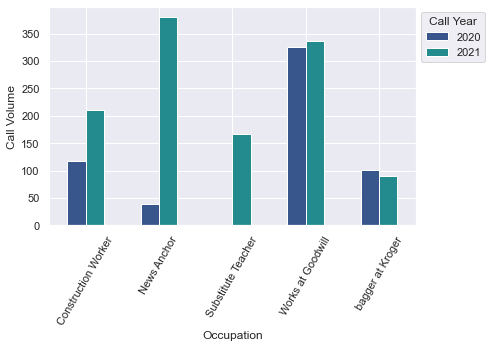

In [88]:
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,11)})
ax = yearlyocc_calls.plot(kind='bar', figsize=(7,5), xlabel='Occupation', ylabel='Call Volume', rot=0, color=['#39568CFF', '#238A8DFF'])
ax.legend(title='Call Year', bbox_to_anchor=(1,1), loc='upper left')
plt.xticks(rotation=60)
plt.tight_layout()
plt.savefig('Call Volume by Year for Top 5 Occupations')
plt.show();

In [ ]:
phoneline = crisis.groupby('CRISIS Call Information - Phone Line')['call_year'].value_counts().unstack()

In [ ]:
phoneline

In [ ]:
ax = phoneline.plot(kind='bar', figsize=(10,10), xlabel='Phone Line', ylabel='Call Volume', rot=0, color=['#440154', '#3B528B', '#21918C'])
ax.legend(title='Call Year', bbox_to_anchor=(1,1), loc='upper left')
plt.xticks(rotation=60)
plt.tight_layout()
plt.savefig('Annual Call Volume by Phone Line')
plt.show();

plt.rcParams['figure.figsize'] = (15,9)
for col in phoneline.columns:
    plt.plot(phoneline[col], linewidth=2, label=col, color=['#440154', '#3B528B', '#21918C'])
plt.xlabel('Phone Line', fontsize=20)
plt.ylabel('Call Year', fontsize=20)
plt.xticks(fontsize=18, rotation=60)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
#plt.set_cmap('viridis')
plt.show()

ax_cis = cisgender_year.plot(kind='line', figsize=(10, 10), cmap="viridis")
cis_labels = ['Female', 'Male']
ax_cis.legend(title='Cisgender Individuals', loc='center left', labels=cis_labels)
plt.title('Cisgender Call Volume by Year')

#hide x axis title
ax_cis.set(xlabel=None)


In [89]:
top5occ['CRISIS Demographics - Homeless?'].value_counts()

No     192
Yes      2
Name: CRISIS Demographics - Homeless?, dtype: int64

In [90]:
top5occ['CRISIS Demographics - Has a disability?'].value_counts()

Yes    663
No     191
Name: CRISIS Demographics - Has a disability?, dtype: int64

In [91]:
top5occ['CRISIS Demographics - Ethnicity'].value_counts()

African-American    586
Caucasian           522
Name: CRISIS Demographics - Ethnicity, dtype: int64

In [92]:
top5occ['CRISIS Demographics - Gender Identity'].value_counts()

Male      1575
Female     191
Name: CRISIS Demographics - Gender Identity, dtype: int64

In [93]:
top5occ['CRISIS Demographics - Income'].value_counts()

FT employment    744
SSDI             662
PT employment    191
Unemployed         1
Name: CRISIS Demographics - Income, dtype: int64

In [94]:
top5occ['CRISIS Demographics - Military'].value_counts()

N/A (did not serve)    1414
Unknown                 352
Name: CRISIS Demographics - Military, dtype: int64

In [95]:
top5zip['CRISIS Demographics - Homeless?'].value_counts()

No    3344
Name: CRISIS Demographics - Homeless?, dtype: int64

In [96]:
top5zip['CRISIS Demographics - Has a disability?'].value_counts()

Yes        3875
No           53
Unknown       3
Name: CRISIS Demographics - Has a disability?, dtype: int64

In [97]:
top5zip['CRISIS Demographics - Gender Identity'].value_counts()

Male           3119
Female         2224
Transgender       1
Name: CRISIS Demographics - Gender Identity, dtype: int64

In [98]:
top5zip['CRISIS Demographics - Income'].value_counts()

SSDI                   667
PT employment           55
SSI                     18
FT employment           14
Unemployed              11
SSDI; SNAP               9
SSDI; PT employment      2
SSDI; Unemployed         2
SSI; Unemployed          1
Name: CRISIS Demographics - Income, dtype: int64

In [99]:
top5zip['CRISIS Demographics - Military'].value_counts()

N/A (did not serve)                3494
Veteran                            1131
Unknown                             938
Family of Military                   10
3rd Party Calling about Veteran       1
Name: CRISIS Demographics - Military, dtype: int64

In [100]:
top5occ['CRISIS Call Information - Phone Line'].value_counts()

Crisis             1471
Crisis Priority     289
NSPL                  6
Name: CRISIS Call Information - Phone Line, dtype: int64

In [101]:
top5zip['CRISIS Call Information - Phone Line'].value_counts()

Crisis             5105
NSPL                407
Crisis Priority     119
Crisis Spanish        3
Name: CRISIS Call Information - Phone Line, dtype: int64

In [102]:
phoneline.columns = [2020, 2021, 2022]
phoneline.head()

NameError: name 'phoneline' is not defined

In [103]:
vis1 = top5occ.groupby('CRISIS Demographics - Occupation')['CRISIS Call Information - Phone Line'].value_counts().unstack()
vis1.head()

CRISIS Call Information - Phone Line  Crisis  Crisis Priority  NSPL
CRISIS Demographics - Occupation                                   
Construction Worker                     50.0            277.0   NaN
News Anchor                            418.0              1.0   NaN
Substitute Teacher                     152.0              9.0   6.0
Works at Goodwill                      661.0              1.0   NaN
bagger at Kroger                       190.0              1.0   NaN

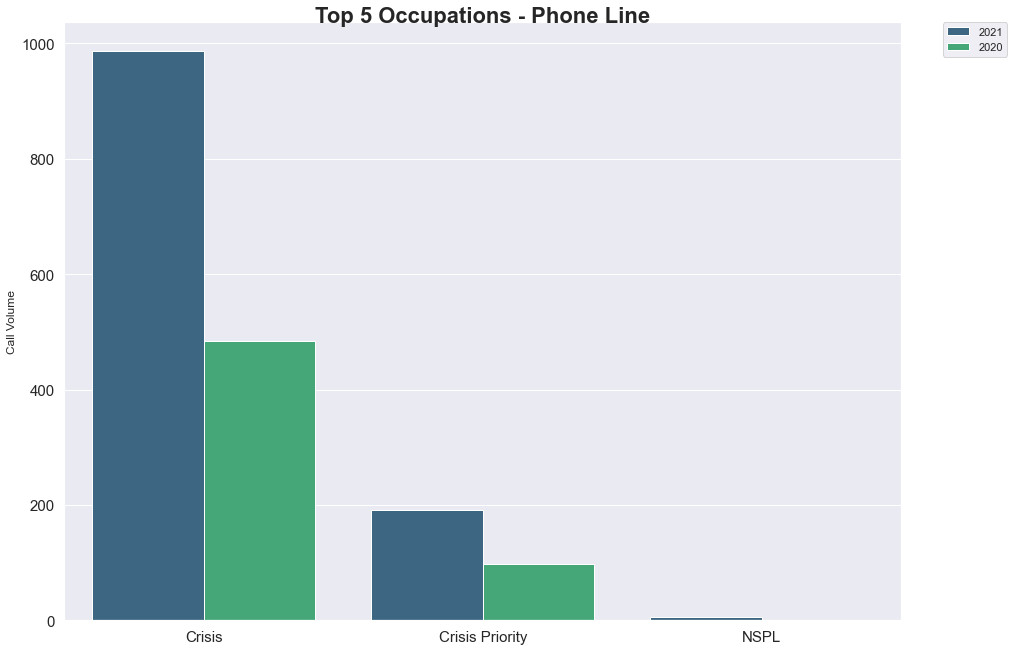

In [104]:
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,11)})
sns.countplot(x='CRISIS Call Information - Phone Line', data=top5occ, hue='call_year', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#plt.Axes.axes.barplot(width=5)
plt.xlabel(None)
plt.ylabel('Call Volume')
#plt.legend(loc='best', frameon=True, fontsize=12)
plt.title("Top 5 Occupations - Phone Line",fontdict= { 'fontsize': 22, 'fontweight':'bold','verticalalignment': 'center'})
plt.tick_params(axis='both', which='major', labelsize=15);

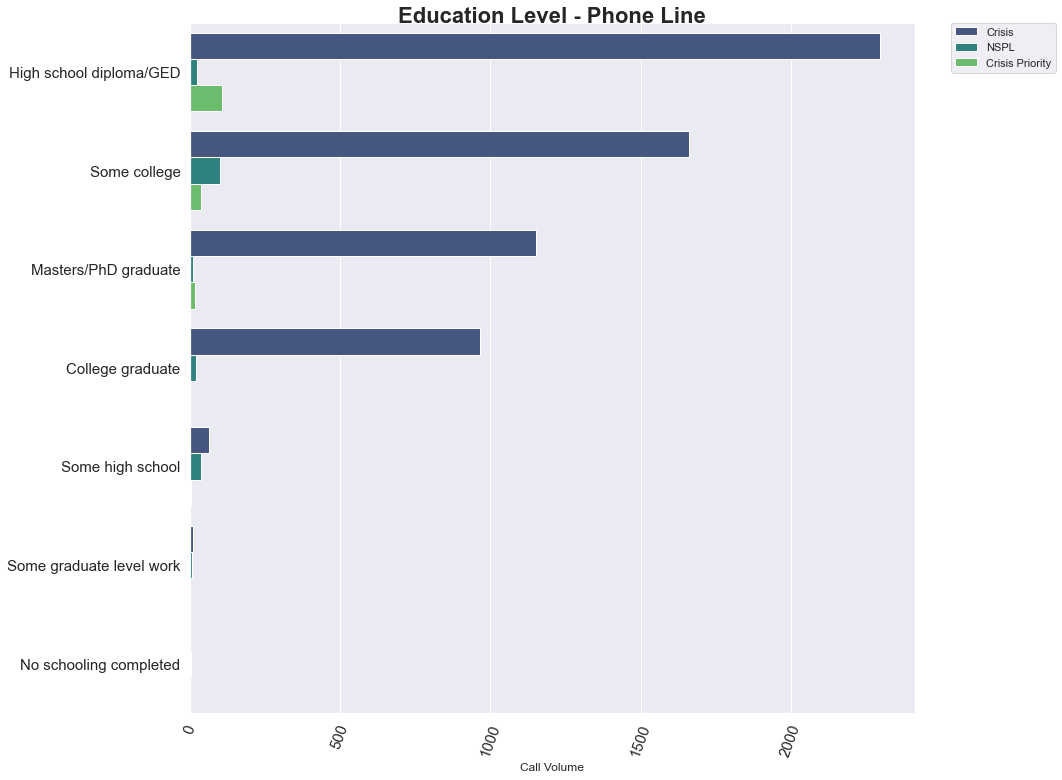

In [105]:
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,11)})
ed_order = ['High school diploma/GED', 'Some college', 'Masters/PhD graduate', 'College graduate', 'Some high school', 'Some graduate level work', 'No schooling completed']
sns.countplot(y='CRISIS Demographics - Education Level', data=crisis, hue='CRISIS Call Information - Phone Line', order=ed_order, hue_order=['Crisis', 'NSPL', 'Crisis Priority'], palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#plt.Axes.axes.barplot(width=5)
plt.xlabel('Call Volume')
plt.ylabel(None)
plt.xticks(rotation=70)
#plt.legend(loc='best', frameon=True, fontsize=12)
plt.title("Education Level - Phone Line",fontdict= { 'fontsize': 22, 'fontweight':'bold','verticalalignment': 'center'})
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('Education Level by Phone Line')
plt.show();

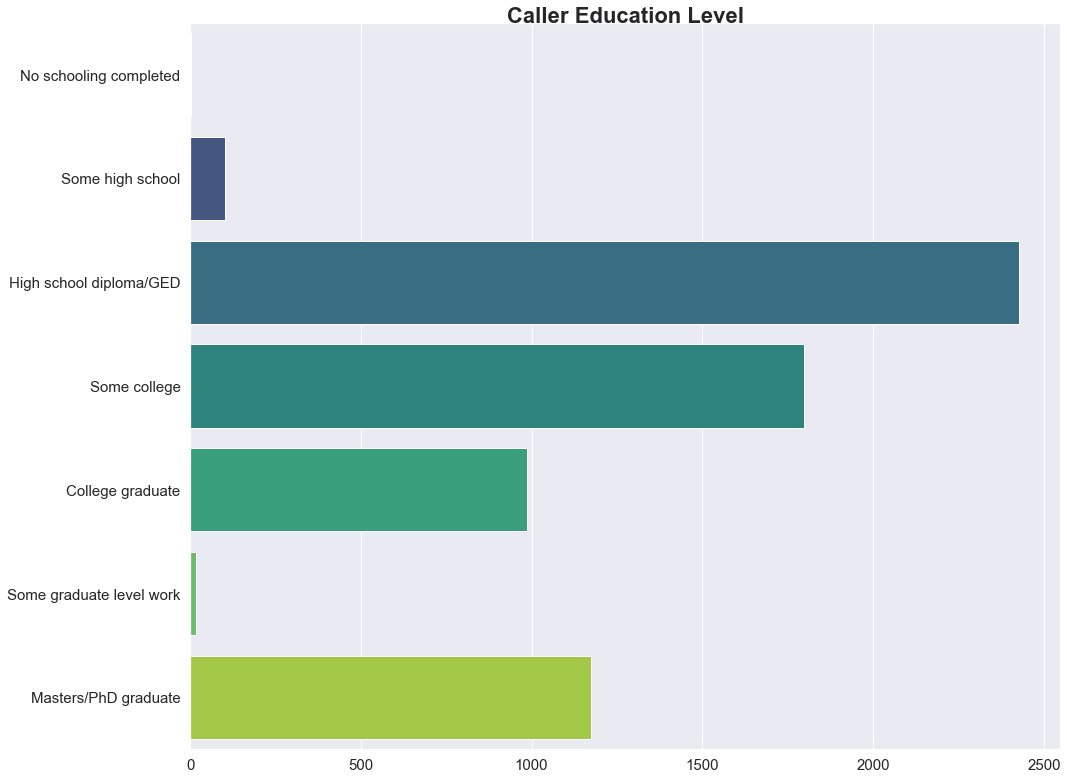

In [177]:
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,11)})
ed_order = ['No schooling completed', 'Some high school', 'High school diploma/GED', 'Some college', 'College graduate', 'Some graduate level work', 'Masters/PhD graduate']
sns.countplot(y='CRISIS Demographics - Education Level', data=crisis, order=ed_order, palette='viridis')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#plt.Axes.axes.barplot(width=5)
plt.xlabel(None)
plt.ylabel(None)
#plt.xticks(rotation=70)
#plt.legend(loc='best', frameon=True, fontsize=12)
plt.title("Caller Education Level",fontdict= { 'fontsize': 22, 'fontweight':'bold','verticalalignment': 'center'})
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('Call Volume by Education Level')
plt.show();

In [107]:
crisis['CRISIS Demographics - Education Level'].value_counts(normalize=True)

High school diploma/GED     0.372983
Some college                0.276471
Masters/PhD graduate        0.180575
College graduate            0.151529
Some high school            0.015522
Some graduate level work    0.002613
No schooling completed      0.000307
Name: CRISIS Demographics - Education Level, dtype: float64

In [108]:
crisis['CRISIS Demographics - Education Level'].value_counts()

High school diploma/GED     2427
Some college                1799
Masters/PhD graduate        1175
College graduate             986
Some high school             101
Some graduate level work      17
No schooling completed         2
Name: CRISIS Demographics - Education Level, dtype: int64

In [109]:
crisis['CRISIS Demographics - Occupation'].value_counts()

Works at Goodwill                     662
News Anchor                           419
Construction Worker                   327
bagger at Kroger                      191
Substitute Teacher                    167
                                     ... 
Factory worker                          1
Sergeant                                1
Retired nondenominational preacher      1
Unemployed                              1
Caregiver at a Nursing Home             1
Name: CRISIS Demographics - Occupation, Length: 89, dtype: int64

In [110]:
crisis['CRISIS Demographics - Occupation'].value_counts().nlargest(50)

Works at Goodwill                     662
News Anchor                           419
Construction Worker                   327
bagger at Kroger                      191
Substitute Teacher                    167
Retired                               128
House cleaner; Substitute             101
retired pro golfer                     40
School bus driver                      37
violin player                          29
Nurse                                  15
Student                                 8
student                                 7
FedEx Driver                            6
Teacher                                 4
multiple                                4
nurse                                   3
Counselor                               3
construction worker                     2
Special Ed Teacher                      2
Educator                                2
RN                                      2
Electrician                             2
Walmart Associate                 

In [111]:
crisis.groupby('CRISIS Demographics - Occupation')['CallerNum'].value_counts().nlargest(25)

CRISIS Demographics - Occupation  CallerNum
Works at Goodwill                  3048547     662
News Anchor                        3769693     419
Construction Worker                3425890     327
bagger at Kroger                   1033159     191
Substitute Teacher                 4309507     167
Retired                            1690605     124
House cleaner; Substitute          1822446     100
retired pro golfer                 2205941      40
School bus driver                  1847470      37
violin player                      2270931      29
Nurse                             -1            15
Student                           -1             8
student                           -1             7
FedEx Driver                       3769693       6
Retired                           -1             4
Teacher                           -1             4
multiple                           1032030       4
Counselor                         -1             3
nurse                             -1  

In [112]:
ethnicity_df.groupby(['CRISIS Demographics - Ethnicity', 'CRISIS Demographics - Gender Identity'])['CallReportNum'].count().sort_values(ascending=False).plot.bar(sns.color_palette("viridis", as_cmap=True),legend=None, tick_label='Plain')
plt.ylabel('Count')
plt.xlabel('Ethnicity')

NameError: name 'ethnicity_df' is not defined

In [113]:
ethgen = crisis.groupby('CRISIS Demographics - Ethnicity')['CRISIS Demographics - Gender Identity'].value_counts().unstack()
ethgen.head(15)

CRISIS Demographics - Gender Identity  Female  Genderqueer    Male  \
CRISIS Demographics - Ethnicity                                      
African-American                       1972.0          NaN  2447.0   
Asian                                    30.0          NaN    17.0   
Caucasian                              7965.0          1.0  4533.0   
Hispanic/Latino                          92.0          NaN    61.0   
Multiracial                              17.0          NaN    15.0   
Native American                           5.0          NaN     1.0   
Other                                    36.0          NaN    30.0   
Unidentified/unknown                     66.0          NaN    65.0   

CRISIS Demographics - Gender Identity  Transgender  Unidentified  
CRISIS Demographics - Ethnicity                                   
African-American                              10.0           1.0  
Asian                                          NaN           NaN  
Caucasian                                     16.0           1.0  
Hispanic/Latino                                2.0           NaN  
Multiracial                                    NaN           NaN  
Native American                                NaN           NaN  
Other                                          NaN           NaN  
Unidentified/unknown                           NaN           8.0

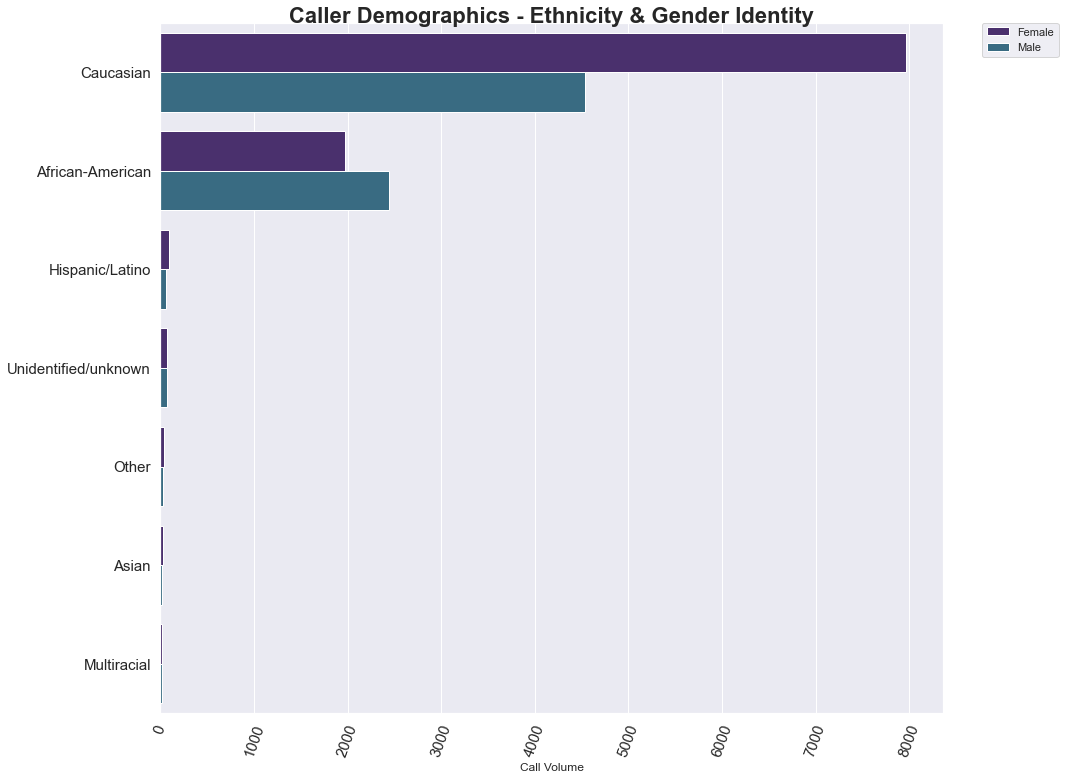

In [114]:
#For Aurora's visualization
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,11)})
eth_order=['Caucasian', 'African-American', 'Hispanic/Latino', 'Unidentified/unknown', 'Other', 'Asian', 'Multiracial']
eth_palette=['#482677FF', '#2D708EFF']
sns.set_palette(palette=eth_palette)
sns.countplot(y='CRISIS Demographics - Ethnicity', data=crisis, hue='CRISIS Demographics - Gender Identity', hue_order=['Female', 'Male'], order=eth_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#plt.Axes.axes.barplot(width=5)
plt.xticks(rotation=70)
plt.xlabel('Call Volume')
plt.ylabel(None)
#plt.legend(loc='best', frameon=True, fontsize=12)
plt.title("Caller Demographics - Ethnicity & Gender Identity",fontdict= { 'fontsize': 22, 'fontweight':'bold','verticalalignment': 'center'})
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('Caller Demographics - Ethnicity & Gender Identity')
plt.show();

In [117]:
crisis.groupby(['CRISIS Demographics - Occupation', 'CallerNum'])['CRISIS Demographics - Marital Status'].value_counts()

CRISIS Demographics - Occupation  CallerNum   CRISIS Demographics - Marital Status
Attorney/ Business owner          -1.0        Married                                  1
BankTeller                        -1.0        Divorced                                 1
Biotech lab worker                -1.0        Single                                   1
Business Owner                    -1.0        Cohabitating                             1
Clerk Dollar General               1030301.0  Single                                   1
                                                                                      ..
retired pro golfer                 2205941.0  Divorced                                40
student                           -1.0        Single                                   4
                                              Married                                  1
teacher                           -1.0        Married                                  1
violin player              

In [123]:
#removing -1, -2 from results to help Megan look at repeat callers with marital status changes.
subset = crisis.loc[-crisis['CallerNum'].isin([-1, -2])]
subset.head()

1  CallReportNum ReportVersion LinkedToCallReportNum CallDateAndTimeStart  \
0                          NaN                   NaN                  nan   
1    101384892.0    Crisis v.2                   NaN  2022-04-30 23:19:00   
8    101382710.0    Crisis v.2                   NaN  2022-04-30 21:13:00   
9    101382566.0    Crisis v.2                   NaN  2022-04-30 21:05:00   
12   101381436.0    Crisis v.2                   NaN  2022-04-30 20:05:00   

1    CallDateAndTimeEnd CallLength  CallerNum PhoneWorkerNum  PhoneWorkerName  \
0                   NaN        NaN        NaN            NaN              NaN   
1   2022-04-30 23:27:00        8.0  1025380.0        55599.0  Darren Anderson   
8   2022-04-30 21:27:00       14.0  2479348.0       169061.0   Tandra Freeman   
9   2022-04-30 21:06:00        1.0  2479348.0       169061.0   Tandra Freeman   
12  2022-04-30 20:20:00       15.0  1802329.0       169061.0   Tandra Freeman   

1  WasRealCall WasHangup WasSexCall WasWrongNumber WasPrankCall WasSilentCall  \
0          NaN       NaN        NaN            NaN          NaN           NaN   
1          NaN       NaN        NaN            NaN          NaN           NaN   
8          NaN       NaN        NaN            NaN          NaN           NaN   
9          NaN       NaN        NaN            NaN          NaN           NaN   
12         NaN       NaN        NaN            NaN          NaN           NaN   

1  GeoCode GeoAssignment CountyName StateProvince    CountryName PostalCode  \
0      NaN           NaN        NaN           NaN            NaN        NaN   
1      NaN           NaN  Robertson            TN  United States        NaN   
8      NaN           NaN    Hickman            TN  United States        NaN   
9      NaN           NaN    Hickman            TN  United States        NaN   
12     NaN           NaN   Davidson            TN  United States        NaN   

1  CensusDivision CensusTrack CensusReportingArea 211Region PhoneExtension  \
0             NaN         NaN                 NaN       NaN            NaN   
1             NaN         NaN                 NaN       NaN            NaN   
8             NaN         NaN                 NaN       NaN            NaN   
9             NaN         NaN                 NaN       NaN            NaN   
12            NaN         NaN                 NaN       NaN            NaN   

1  PhoneType ThirdPartyName ThirdPartyOrganization ThirdPartyPhoneNumber  \
0        NaN            NaN                    NaN                   NaN   
1        NaN            NaN                    NaN                   NaN   
8        NaN            NaN                    NaN                   NaN   
9        NaN            NaN                    NaN                   NaN   
12       NaN            NaN                    NaN                   NaN   

1  ThirdPartyAddress ThirdPartyCity ThirdPartyCounty ThirdPartyStateProvince  \
0                NaN            NaN              NaN                     NaN   
1                NaN            NaN              NaN                     NaN   
8                NaN            NaN              NaN                     NaN   
9                NaN            NaN              NaN                     NaN   
12               NaN            NaN              NaN                     NaN   

1  ThirdPartyPostalCode Narrative  \
0                   NaN       NaN   
1                   NaN       NaN   
8                   NaN       NaN   
9                   NaN       NaN   
12                  NaN       NaN   

1                                   VolunteerComments Feedback  \
0                                                 NaN      NaN   
1   Client said she broke her wrist while coming i...      NaN   
8                 Caller has conflict with ex-husband      NaN   
9   Caller is having difficulty with ex-husband an...      NaN   
12                Caller is concerned about a friend.      NaN   

1  CallersFeedback TextField2 TextField3 TextField4 TextField

In [124]:
subset.groupby('CallerNum')['CRISIS Demographics - Marital Status'].value_counts()

CallerNum  CRISIS Demographics - Marital Status
1025380.0  Single                                   723
1029813.0  Single                                    24
1029822.0  Single                                   713
1030233.0  Divorced                                   2
           Single                                     1
1030262.0  Single                                   237
1030301.0  Single                                   253
1030347.0  Divorced                                 729
1031947.0  Divorced                                 654
1032030.0  Single                                     4
1032539.0  Single                                    38
1033159.0  Single                                   191
1033354.0  Single                                   312
1033372.0  Married                                   40
           Widowed                                    4
           Single                                     1
1033478.0  Single                                   993


In [126]:
#Megan's code
marital_status_change=subset.groupby(['CallerNum','CallDateAndTimeStart'])['CRISIS Demographics - Marital Status'].value_counts()
marital_status_change

CallerNum  CallDateAndTimeStart  CRISIS Demographics - Marital Status
1025380.0  2020-01-01 11:43:00   Single                                  1
           2020-01-02 06:19:00   Single                                  1
           2020-01-03 06:15:00   Single                                  1
           2020-01-05 07:59:00   Single                                  1
           2020-01-06 08:02:00   Single                                  1
                                                                        ..
4366469.0  2021-12-07 17:34:00   Single                                  1
           2021-12-09 18:27:00   Single                                  1
           2021-12-13 18:52:00   Single                                  1
           2021-12-17 16:10:00   Single                                  1
           2021-12-17 17:16:00   Single                                  1
Name: CRISIS Demographics - Marital Status, Length: 13177, dtype: int64

In [127]:
marital_status_change.to_csv('fcs_marital_status_changes.csv')

In [132]:
top5occ.groupby('CRISIS Demographics - Occupation')['CallerNum'].value_counts()

CRISIS Demographics - Occupation  CallerNum
Construction Worker               3425890      327
News Anchor                       3769693      419
Substitute Teacher                4309507      167
Works at Goodwill                 3048547      662
bagger at Kroger                  1033159      191
Name: CallerNum, dtype: int64

In [140]:
subset['CallerNum'].value_counts().nlargest(55)

1155260.0    1392
2270935.0    1156
1033478.0    1118
3620809.0     926
1025380.0     879
1030347.0     859
1314449.0     788
3048547.0     784
1031947.0     782
1029822.0     767
1802329.0     708
2479348.0     642
2003009.0     495
3769693.0     465
3425890.0     430
3346390.0     406
3519620.0     375
1033354.0     348
1030301.0     327
1690625.0     302
1030262.0     286
1144311.0     269
4309507.0     269
1790540.0     234
4495477.0     212
1033159.0     191
4366469.0     185
2479370.0     182
3835361.0     136
1690605.0     131
1822446.0     122
2588065.0     117
3449539.0     111
1030233.0      94
1033485.0      86
2755895.0      81
1758167.0      81
1128346.0      71
2205941.0      64
2479377.0      62
1847470.0      53
1033372.0      48
1033761.0      43
4812590.0      41
1032539.0      38
2270931.0      32
1853895.0      28
2401769.0      25
1029813.0      24
4738962.0      23
1032030.0      11
1667946.0       7
2393358.0       3
3451659.0       2
1984960.0       2
Name: Call

In [143]:
call_counts = pd.DataFrame(subset['CallerNum'].value_counts().reset_index().values, columns=['CallerNum', 'Count'])
call_counts_index = call_counts.sort_index(axis=0, ascending=True)
call_counts_index.head()

CallerNum   Count
0  1155260.0  1392.0
1  2270935.0  1156.0
2  1033478.0  1118.0
3  3620809.0   926.0
4  1025380.0   879.0

In [154]:
def assign_length(row):
    if row <= 20:
        result = "2 - 20 calls"
    elif row <= 50:
        result = "21 - 50 calls"
    elif row <= 100:
        result = "51 - 100 calls"
    elif row <= 250:
        result = "101 - 250 calls"
    elif row <= 500:
        result = "251 - 500 calls"
    elif row <= 750:
        result = "501 - 750 calls"
    elif row <= 1000:
        result = "751 - 1000 calls"
    else:
        result = "More than 1000 calls"
    return result

call_counts_index['Call_Volume_Group'] = call_counts_index['Count'].apply(assign_length)
call_counts_index.head()

CallerNum   Count     Call_Volume_Group
0  1155260.0  1392.0  More than 1000 calls
1  2270935.0  1156.0  More than 1000 calls
2  1033478.0  1118.0  More than 1000 calls
3  3620809.0   926.0      751 - 1000 calls
4  1025380.0   879.0      751 - 1000 calls

In [155]:
call_counts_index['Call_Volume_Group'].value_counts()

251 - 500 calls         11
2 - 20 calls            11
101 - 250 calls         10
21 - 50 calls            9
51 - 100 calls           8
751 - 1000 calls         7
More than 1000 calls     3
501 - 750 calls          2
Name: Call_Volume_Group, dtype: int64

No handles with labels found to put in legend.


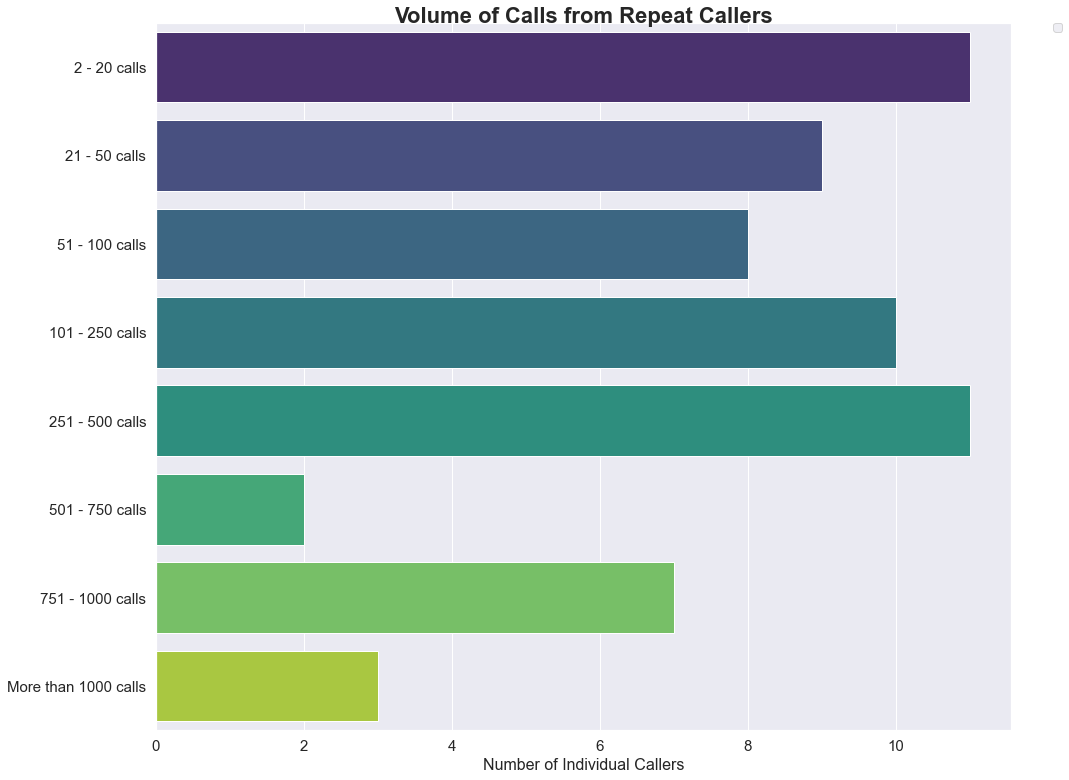

In [176]:
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,11)})
vol_order=['2 - 20 calls', '21 - 50 calls', '51 - 100 calls', '101 - 250 calls', '251 - 500 calls', '501 - 750 calls', '751 - 1000 calls', 'More than 1000 calls']
sns.countplot(y='Call_Volume_Group', data=call_counts_index, order=vol_order, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#plt.Axes.axes.barplot(width=5)
#plt.xticks(rotation=70)
plt.ylabel(None)
plt.xlabel('Number of Individual Callers', fontdict= {'fontsize': 16})
#plt.legend(loc='best', frameon=True, fontsize=12)
plt.title("Volume of Calls from Repeat Callers",fontdict= { 'fontsize': 22, 'fontweight':'bold','verticalalignment': 'center'})
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('Volume of Calls from Repeat Callers')
plt.show();

No handles with labels found to put in legend.


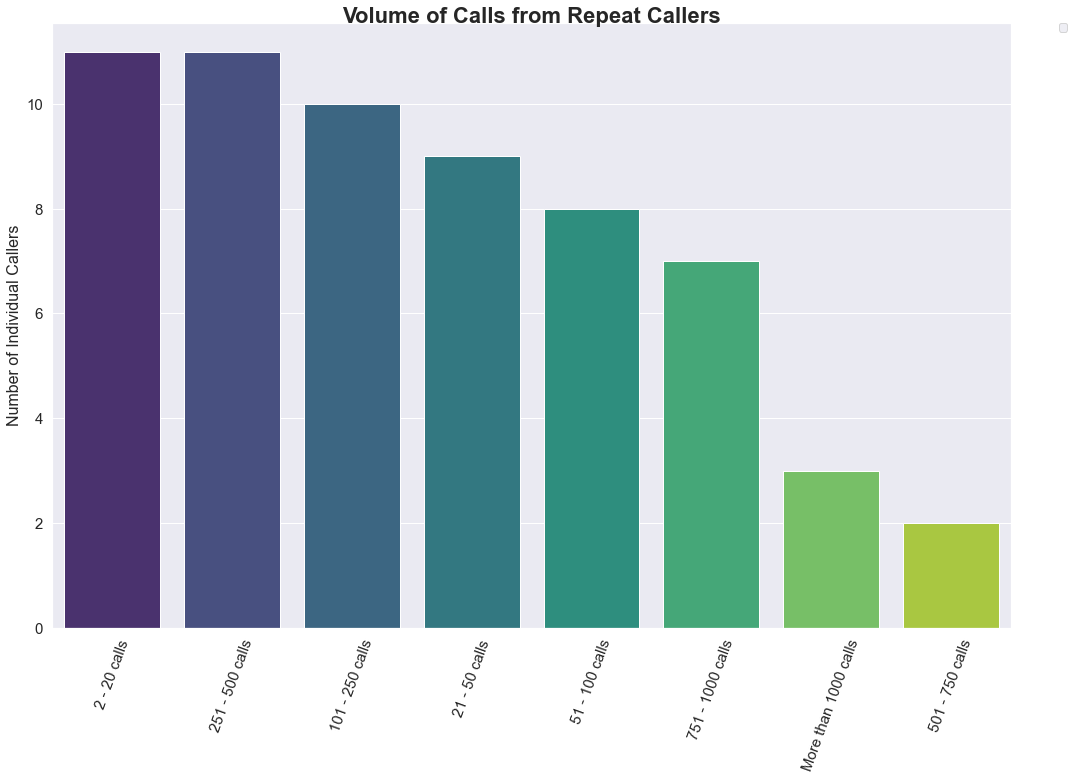

In [173]:
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,11)})
vol_order=['2 - 20 calls', '251 - 500 calls', '101 - 250 calls', '21 - 50 calls', '51 - 100 calls', '751 - 1000 calls', 'More than 1000 calls', '501 - 750 calls',]
sns.countplot(x='Call_Volume_Group', data=call_counts_index, order=vol_order, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#plt.Axes.axes.barplot(width=5)
plt.xticks(rotation=70)
plt.xlabel(None)
plt.ylabel('Number of Individual Callers', fontdict= {'fontsize': 16})
#plt.legend(loc='best', frameon=True, fontsize=12)
plt.title("Volume of Calls from Repeat Callers",fontdict= { 'fontsize': 22, 'fontweight':'bold','verticalalignment': 'center'})
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('Volume of Calls from Repeat Callers_2')
plt.show();

In [167]:
ethcallers = pd.DataFrame(crisis['CRISIS Demographics - Ethnicity'].value_counts().reset_index().values, columns=['CRISIS Demographics - Ethnicity', 'CallerNum', 'Count'])
ethcallers_index = ethcallers.sort_index(axis=0, ascending=True)
ethcallers_index.head(10)

ValueError: Shape of passed values is (8, 2), indices imply (8, 3)

In [168]:
ethcallers = crisis.groupby('CRISIS Demographics - Ethnicity')['CallerNum'].value_counts(normalize=True).unstack()
ethcallers.head(10)

CallerNum                        -2        -1         1025380   1029813  \
CRISIS Demographics - Ethnicity                                           
African-American                 0.008778  0.184560       NaN       NaN   
Asian                                 NaN  1.000000       NaN       NaN   
Caucasian                        0.023128  0.258633   0.05766  0.001914   
Hispanic/Latino                  0.006289  0.993711       NaN       NaN   
Multiracial                           NaN  1.000000       NaN       NaN   
Native American                       NaN  1.000000       NaN       NaN   
Other                                 NaN  1.000000       NaN       NaN   
Unidentified/unknown                  NaN  1.000000       NaN       NaN   

CallerNum                         1029822   1030233   1030262   1030301  \
CRISIS Demographics - Ethnicity                                           
African-American                      NaN       NaN       NaN  0.056944   
Asian                                 NaN       NaN       NaN       NaN   
Caucasian                        0.056863  0.000558  0.018901       NaN   
Hispanic/Latino                       NaN       NaN       NaN       NaN   
Multiracial                           NaN       NaN       NaN       NaN   
Native American                       NaN       NaN       NaN       NaN   
Other                                 NaN       NaN       NaN       NaN   
Unidentified/unknown                  NaN       NaN       NaN       NaN   

CallerNum                         1030347   1031947   1032030   1032539  \
CRISIS Demographics - Ethnicity                                           
African-American                      NaN       NaN       NaN       NaN   
Asian                                 NaN       NaN       NaN       NaN   
Caucasian                        0.058139  0.052157  0.000319  0.003031   
Hispanic/Latino                       NaN       NaN       NaN       NaN   
Multiracial                           NaN       NaN       NaN       NaN   
Native American                       NaN       NaN       NaN       NaN   
Other                                 NaN       NaN       NaN       NaN   
Unidentified/unknown                  NaN       NaN       NaN       NaN   

CallerNum                         1033159   1033354   1033372   1033478  \
CRISIS Demographics - Ethnicity                                           
African-American                      NaN  0.070223  0.010128  0.223498   
Asian                                 NaN       NaN       NaN       NaN   
Caucasian                        0.015232       NaN       NaN       NaN   
Hispanic/Latino                       NaN       NaN       NaN       NaN   
Multiracial                           NaN       NaN       NaN       NaN   
Native American                       NaN       NaN       NaN       NaN   
Other                                 NaN       NaN       NaN       NaN   
Unidentified/unknown                  NaN       NaN       NaN       NaN   

CallerNum                         1033485   1033761   1128346   1144311  \
CRISIS Demographics - Ethnicity                                           
African-American                 0.013054       NaN       NaN       NaN   
Asian                                 NaN       NaN       NaN       NaN   
Caucasian                             NaN   0.00008  0.005423  0.021453   
Hispanic/Latino                       NaN       NaN       NaN       NaN   
Multiracial                           NaN       NaN       NaN       NaN   
Native American                       NaN       NaN       NaN       NaN   
Other                                 NaN       NaN       NaN       NaN   
Unidentified/unknown                  NaN       NaN       NaN       NaN   

CallerNum                         1155260   1314449   1667946   1690605  \
CRISIS Demographics - Ethnicity                                           
African-American                      NaN  0.149899       NaN       NaN   
Asian               

In [169]:
ethcallers.to_csv('ethnicitycallvolume.csv')